<h1>2- Data Profiling</h1>

<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px;">This section offers an in-depth exploration of the structure, statistics, and spread of the data found in our "member model data" and "city model data" tables. It presents a comprehensive snapshot of the data's features and subtleties.</p>

In [1]:
# Dependencies and Setup
import package as pk

Package: Resources loaded. ☑


<h2>1-2- Import Data from BigQuery Tables into Spark DataFrames</h2>

In [2]:
# Instantiate the 'DataToSpark' class to handle KKBOX data
kkbox = pk.DataToSpark("customer-churn-391917", "kkbox")

# Load specific tables into DataFrames
tables_to_load = ["member_model_main","city_model_main"]
kkbox.load_tables(tables_to_load)

# Retrieve the stored DataFrames
table = kkbox.get_tables()

In [3]:
# Create an instance of the class with models
member_model_df = table["member_model_main"]
city_model_df = table["city_model_main"]

<h2>2-2- Visualization and Statistics</h2>

<h3> 1-2-2- Churn Data</h3> 

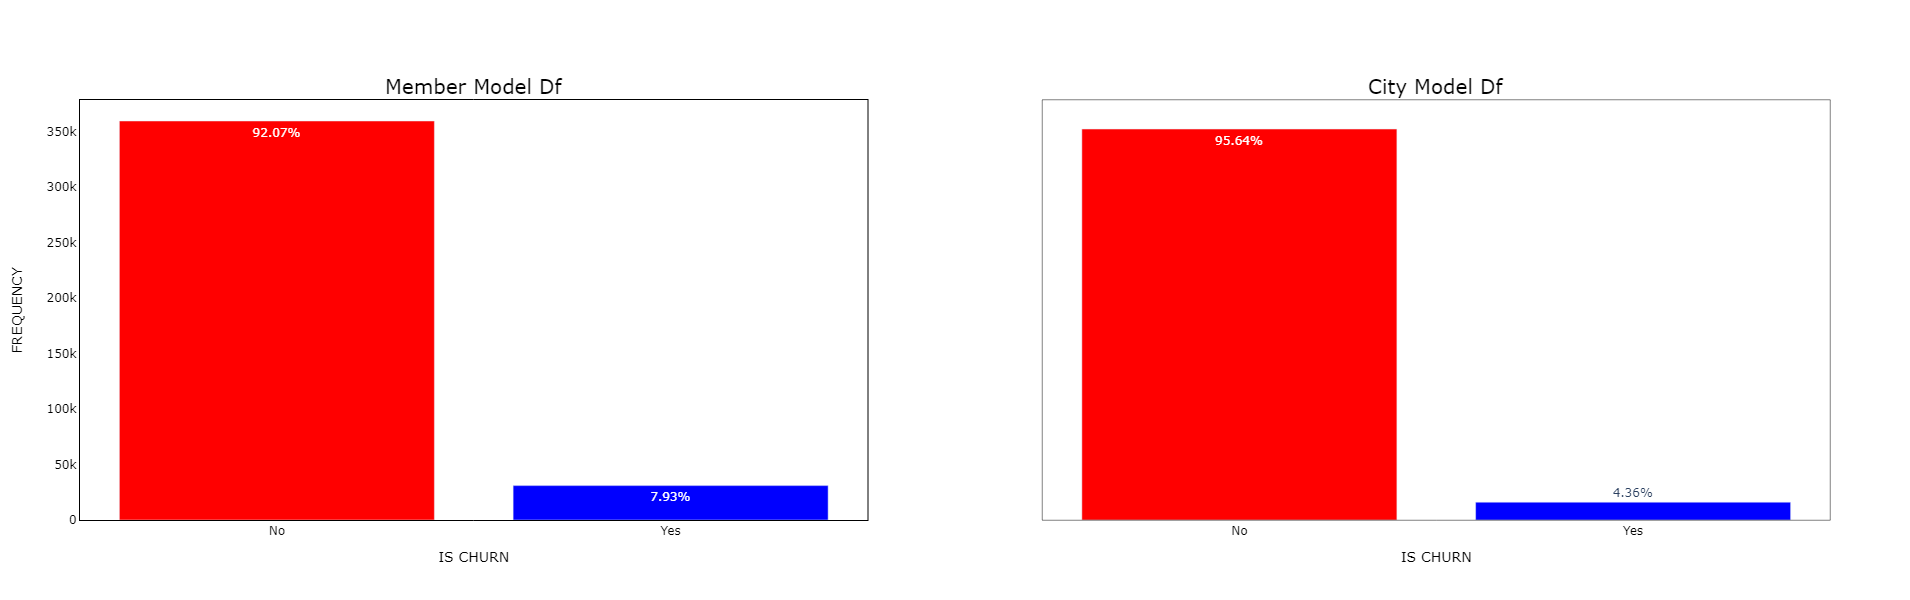

In [4]:
# Call the 'bar_chart' function from plots.py to create a churn bar chart
pk.bar_chart([member_model_df, city_model_df], 'is_churn')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">In our dataset, churn represents whether users discontinue their subscription or service. Upon analyzing the member_model and city_model data, we found a pronounced trend towards the "No" churn category: <b>92.07%</b> in member_model and <b>95.64%</b> in city_model. This indicates a strong retention rate for the users in both categories.</p>

<h4> 2-2-2- City Data</h4> 

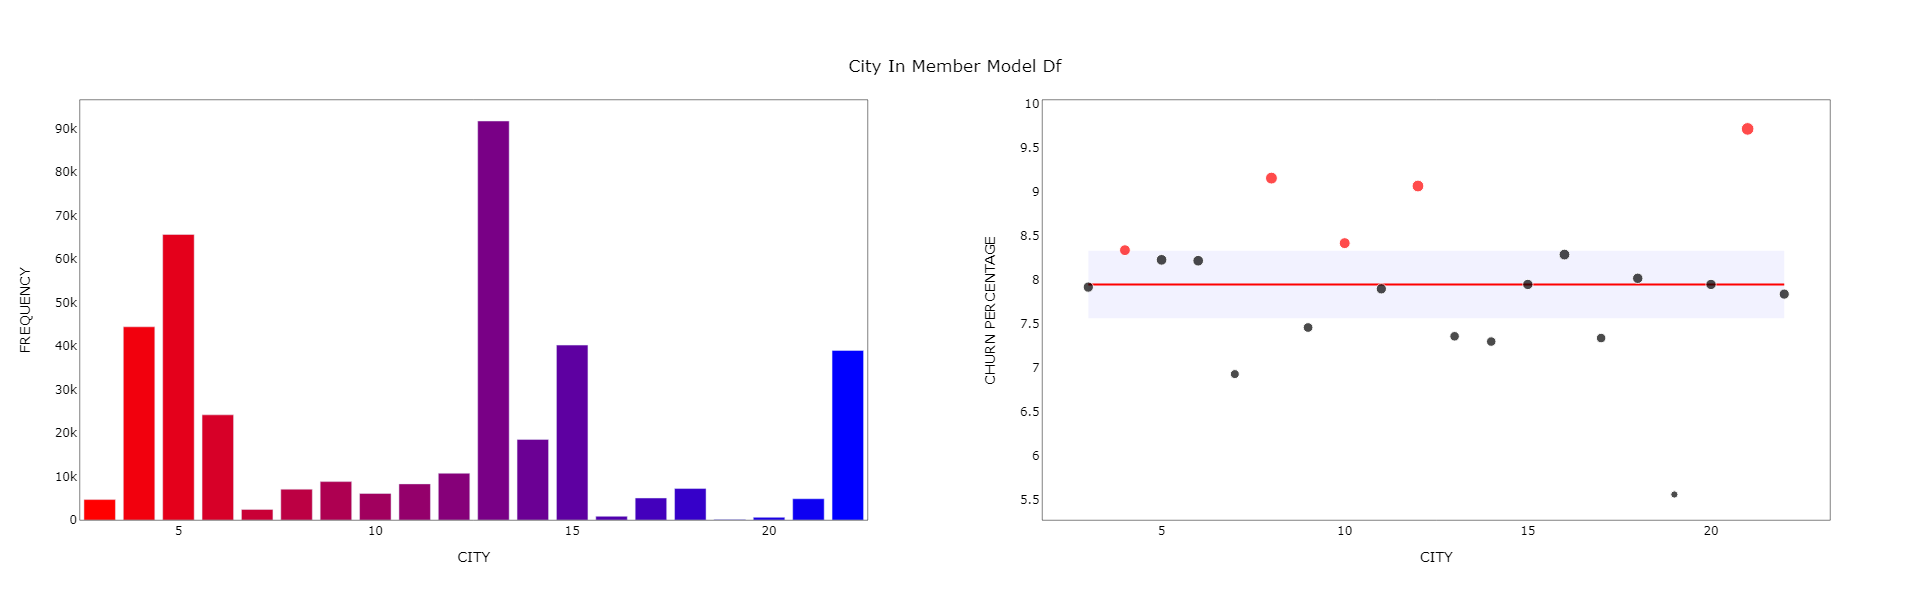

In [5]:
# City
pk.bar_scatter_chart(member_model_df, 'city')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">The member dataset shows that 51.92% of the entries are from a particular city, referred to as 'city 1'. Following this, 'city 13' and 'city 5' have the highest frequencies. Furthermore, there's no observable correlation between the city of origin and the churn rate.</p>

<h4> 3-2-2- Age Evaluation</h4> 
<ol>
    <p><ins>Based on Age Category:</ins></p>
    <li>Unclear: Input 0 (Category 0)</li>
    <li>Children: 1-12 years (Category 1)</li>
    <li>Adolescents: 13-19 years (Category 2)</li>
    <li>Young Adults: 20-34 years (Category 3)</li>
    <li>Adults: 35-64 years (Category 4)</li>
    <li>Seniors: 65+ years (Category 5)</li>
</ol>

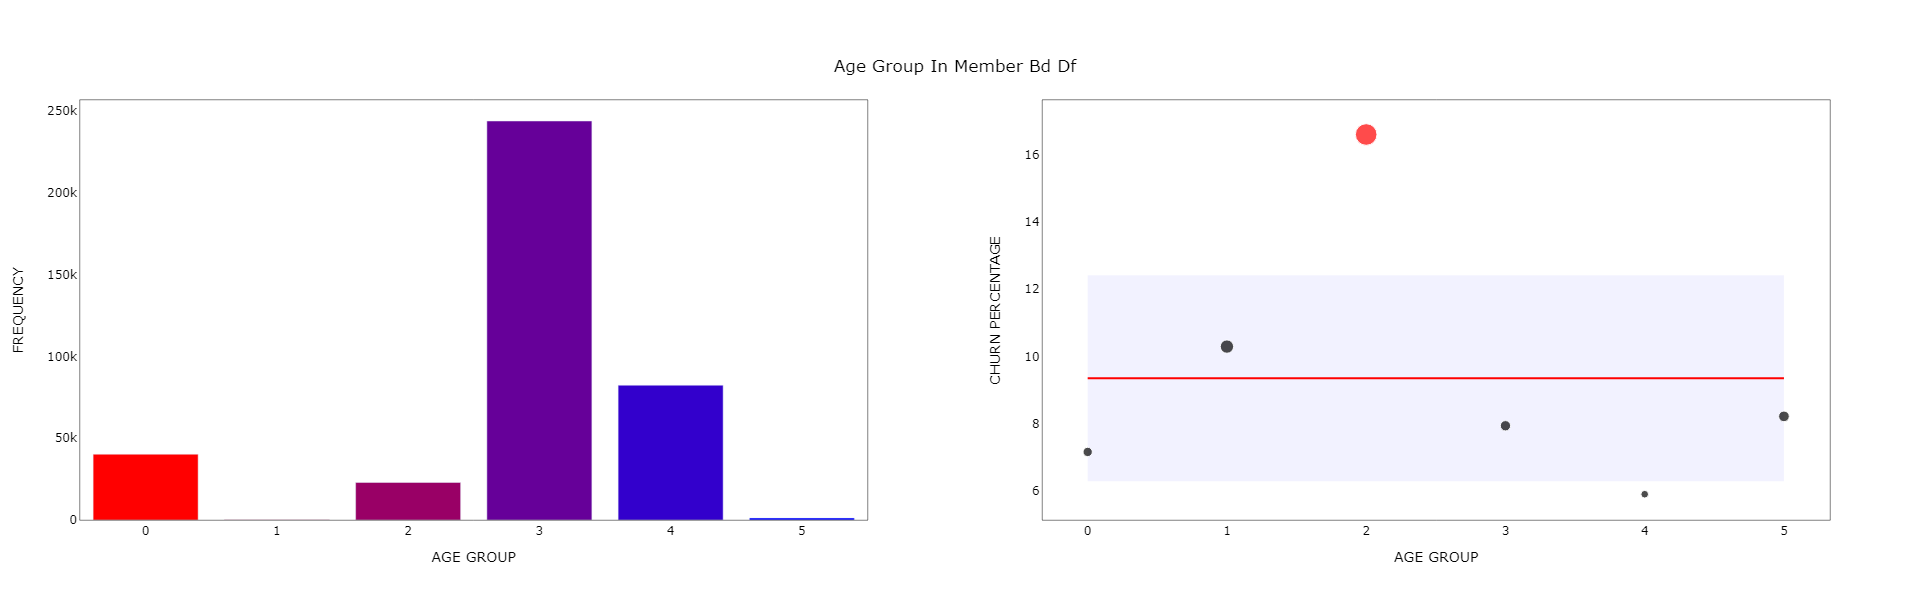

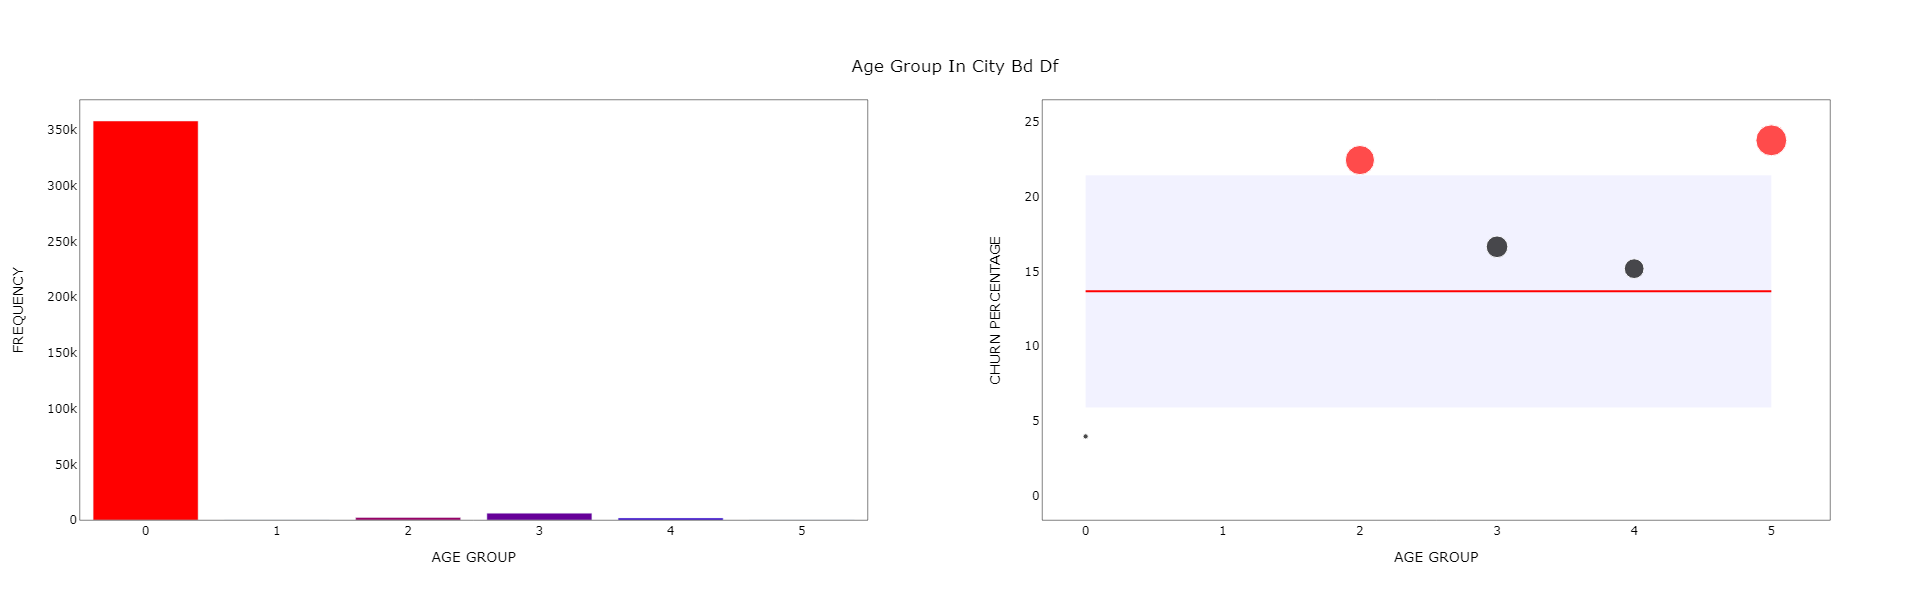

In [6]:
# Call the 'bucketized' function from helpers.py to categorize 'bd' column
member_bd_df=pk.bucketized(member_model_df, 'bd', 'age_group', [1, 13, 20, 35, 65])
pk.bar_scatter_chart(member_bd_df, 'age_group')

city_bd_df=pk.bucketized(city_model_df, 'bd', 'age_group', [1, 13, 20, 35, 65])
pk.bar_scatter_chart(city_bd_df, 'age_group')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">Both datasets exhibit an unclear category, with the city dataset displaying the highest frequency in this category. Notably, the age group categorized as Adolescents (13-19 years, labeled as Category 2) showcases the highest churn percentage. This group's churn rate lies outside the typical statistical range for age in these datasets.</p>

<h4> 4-2-2- Gender Evaluation</h4> 
<ol>
    <p><ins>Based on Gender Category:</ins></p>
    <li>Unclear: Input null (Category 0)</li>
    <li>Male: male (Category 1)</li>
    <li>Female: female (Category 2)</li>
</ol>

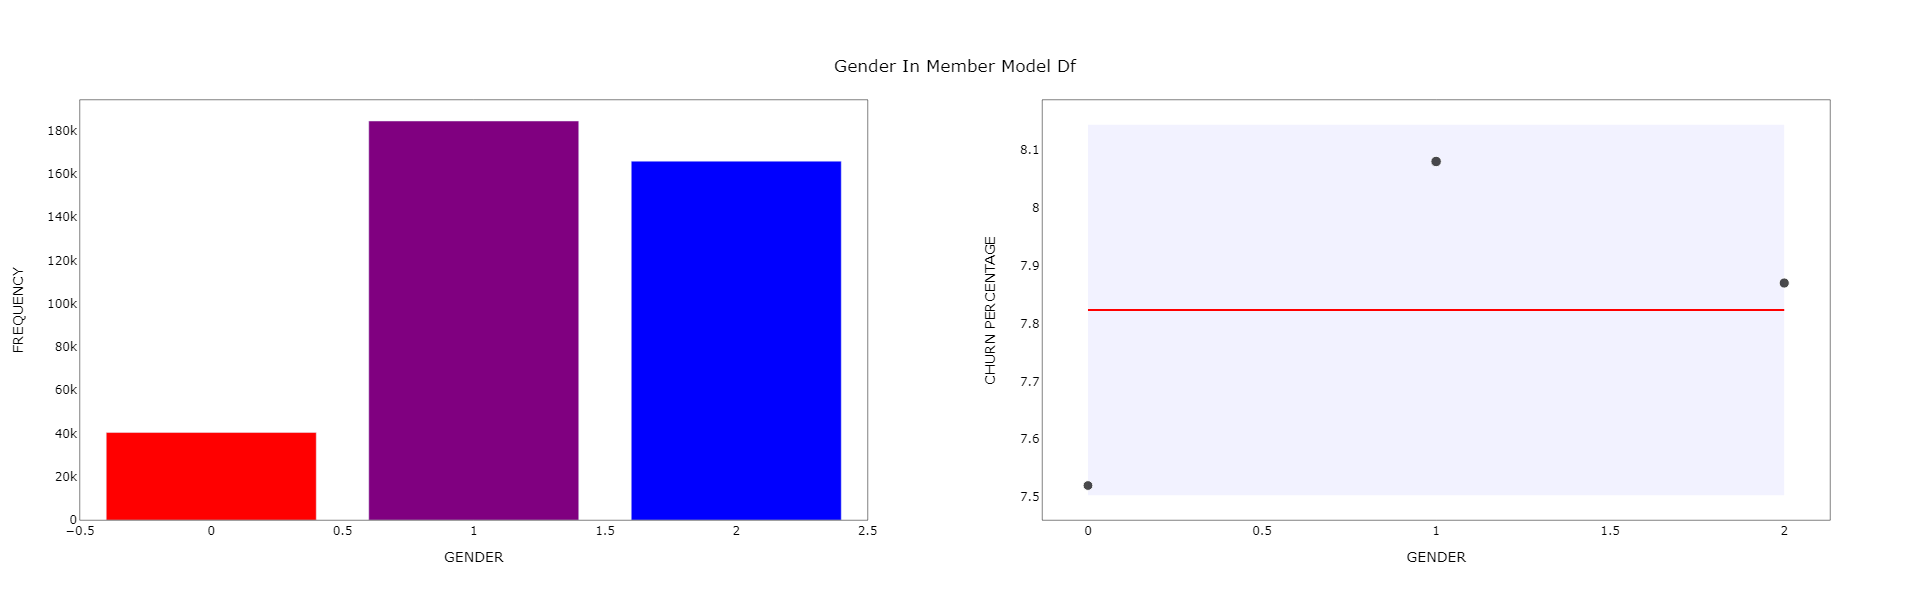

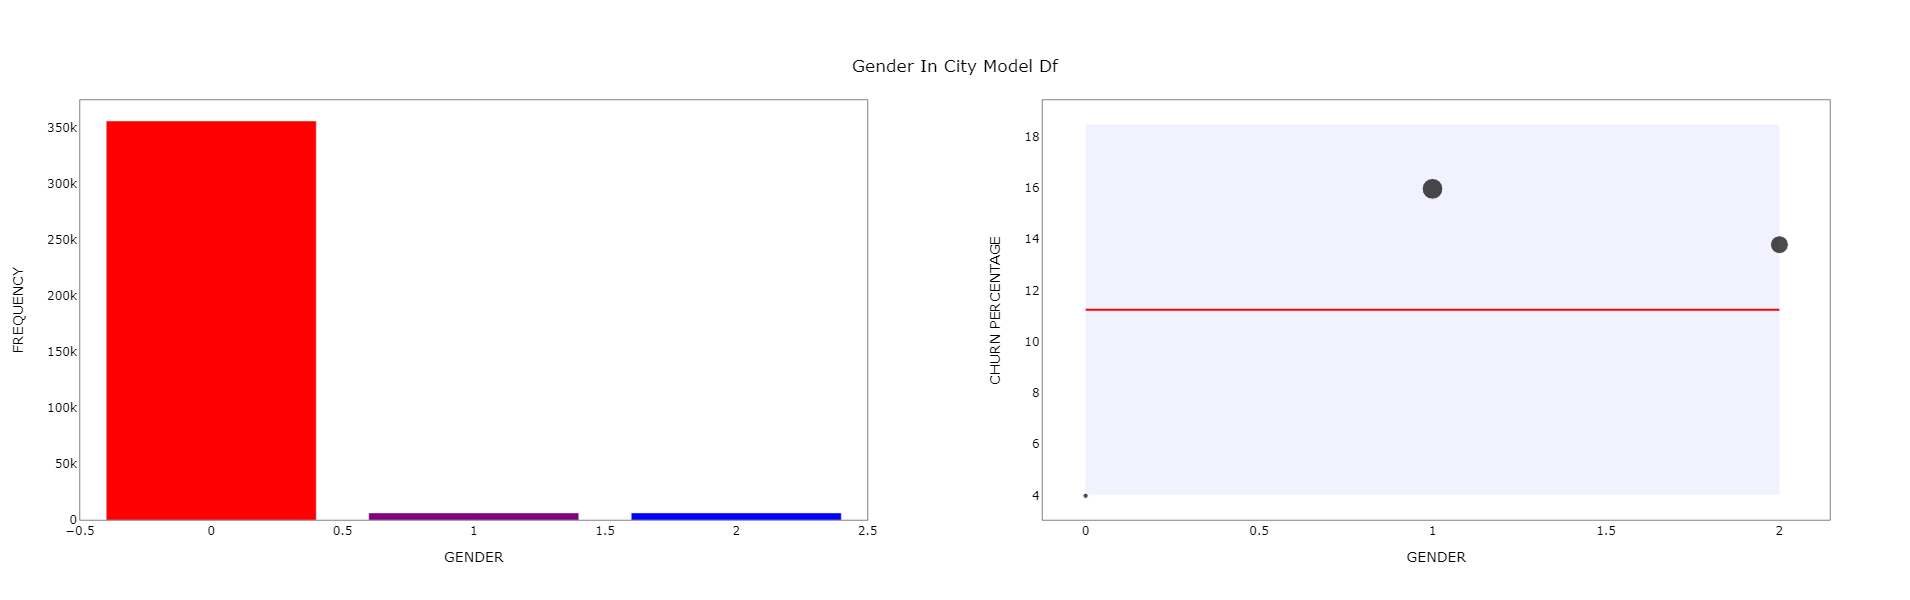

In [28]:
# Gender
pk.bar_scatter_chart(member_model_df, 'gender')

pk.bar_scatter_chart(city_model_df, 'gender')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">Both datasets exhibit an unclear category, with the city dataset displaying the highest frequency in this category. Notably, the age group categorized as Adolescents (13-19 years, labeled as Category 2) showcases the highest churn percentage. This group's churn rate lies outside the typical statistical range for age in these datasets.</p>

<h4> 5-2-2- Registration Via</h4> 

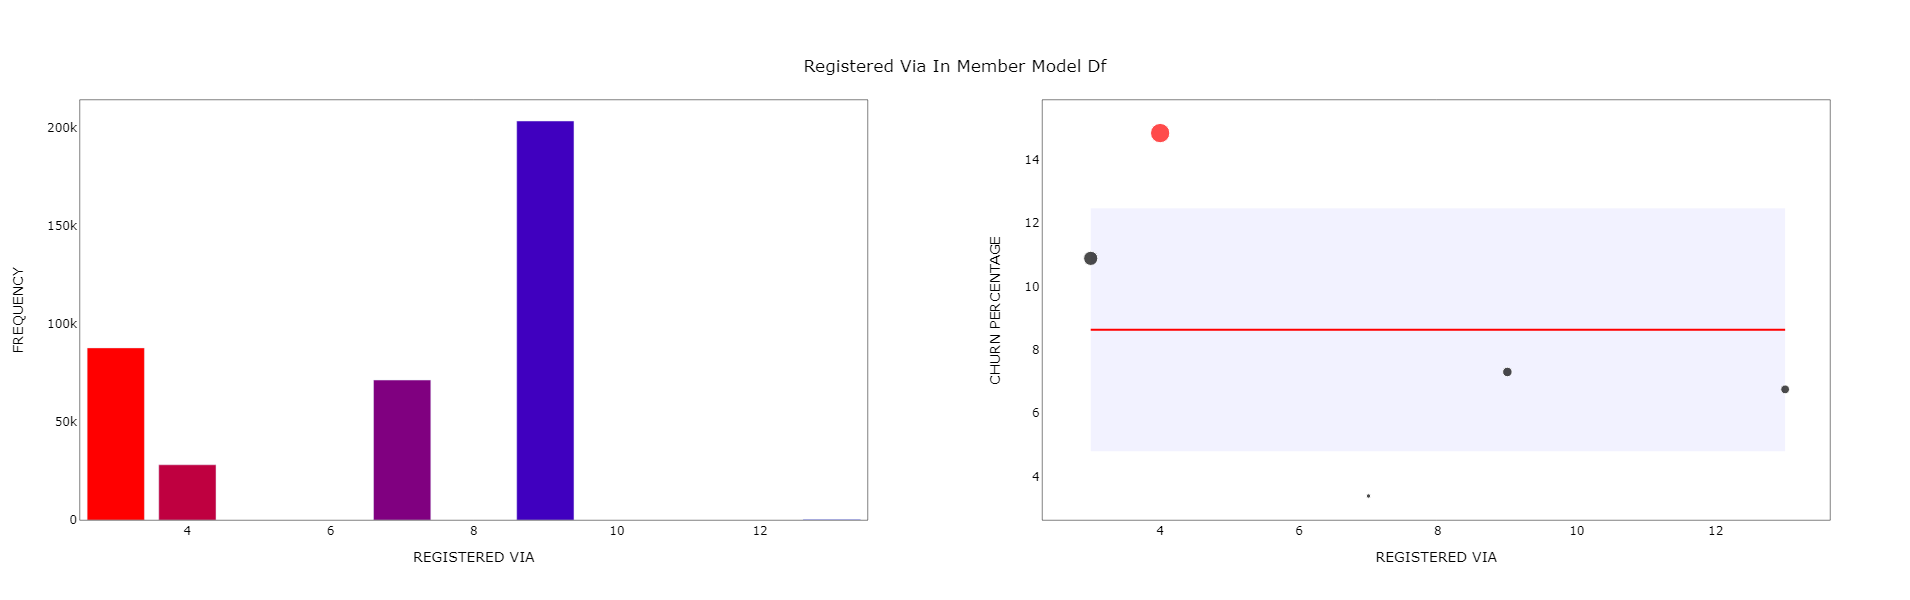

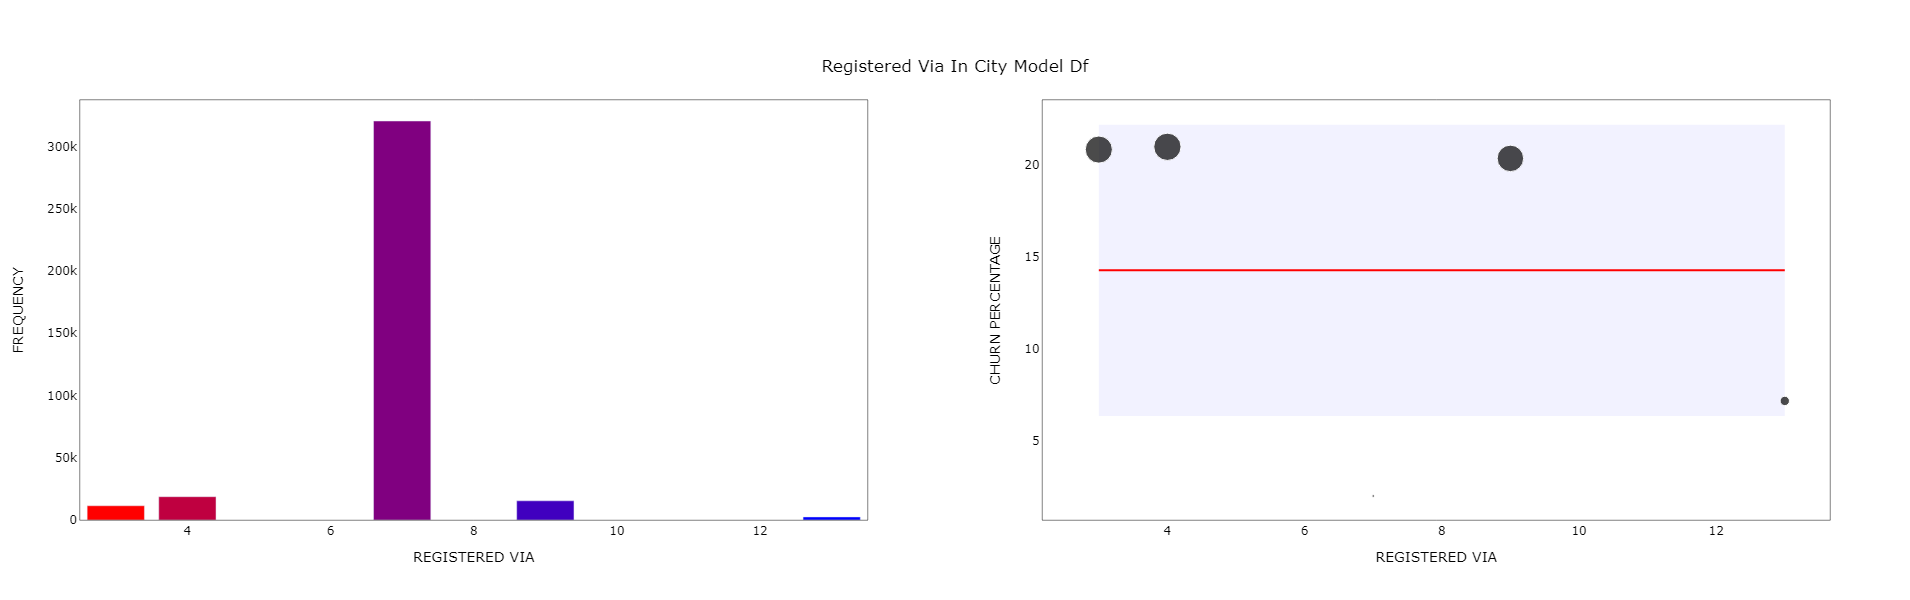

In [9]:
# registration via "member_model_df"
pk.bar_scatter_chart(member_model_df, 'registered_via')

# registration via "city_model_df"
pk.bar_scatter_chart(city_model_df, 'registered_via')

<h4> 6-2-2- Registration Dates</h4> 

In [10]:
def generate_charts(model_df):
    """
    Generate charts based on the provided DataFrame.
    
    Args:
    - model_df (DataFrame): Input DataFrame with 'registration_init_time' column.
    
    Returns:
    - tuple: A tuple containing the year-based bar scatter chart and the sub_line chart for month.
    """
    
    # Extract the year from 'registration_init_time' column
    date_df = model_df.withColumn("registration_year", pk.year(pk.col("registration_init_time")))
    
    # Filter data to exclude records from the year 2017 and onwards
    date_df_filter = date_df.filter(pk.col("registration_year") < 2017)
    
    # Generate a bar scatter chart based on registration year
    year_chart = pk.bar_scatter_chart(date_df_filter, 'registration_year')
    
    # Filter data to only include records from the last 4 years (2013-2016)
    last_4_df = date_df.filter((pk.col("registration_year") >= 2013) & (pk.col("registration_year") < 2017))
    
    # Extract month and day from 'registration_init_time'
    last_4_df = last_4_df.withColumn("registration_month", pk.month("registration_init_time"))
    last_4_df = last_4_df.withColumn("registration_day", pk.dayofmonth("registration_init_time"))
    
    # Generate a sub_line chart based on registration month within the years 2013-2016
    month_chart = pk.sub_line(last_4_df, ["registration_year", "registration_month"], [2013, 2014, 2015, 2016])


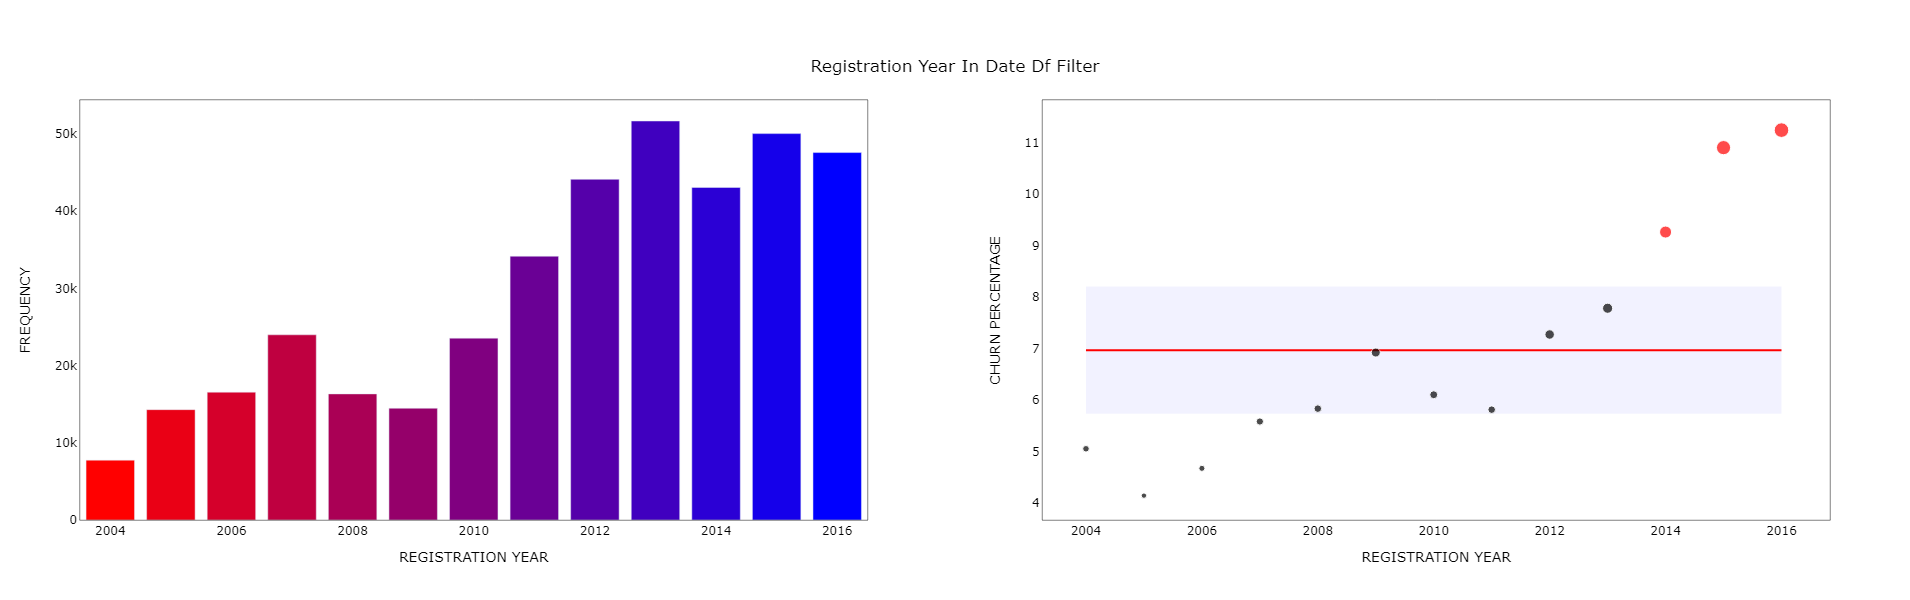

23/09/14 01:26:29 WARN org.apache.spark.util.Utils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.


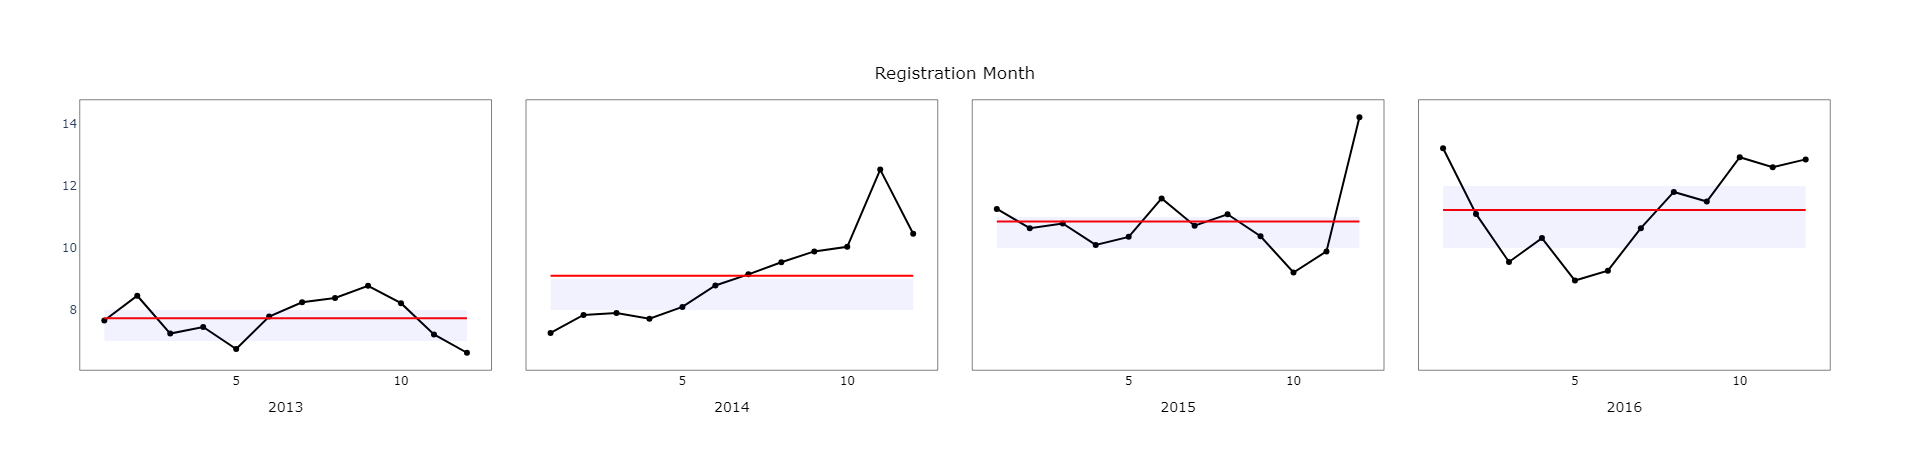

In [11]:
generate_charts(member_model_df)

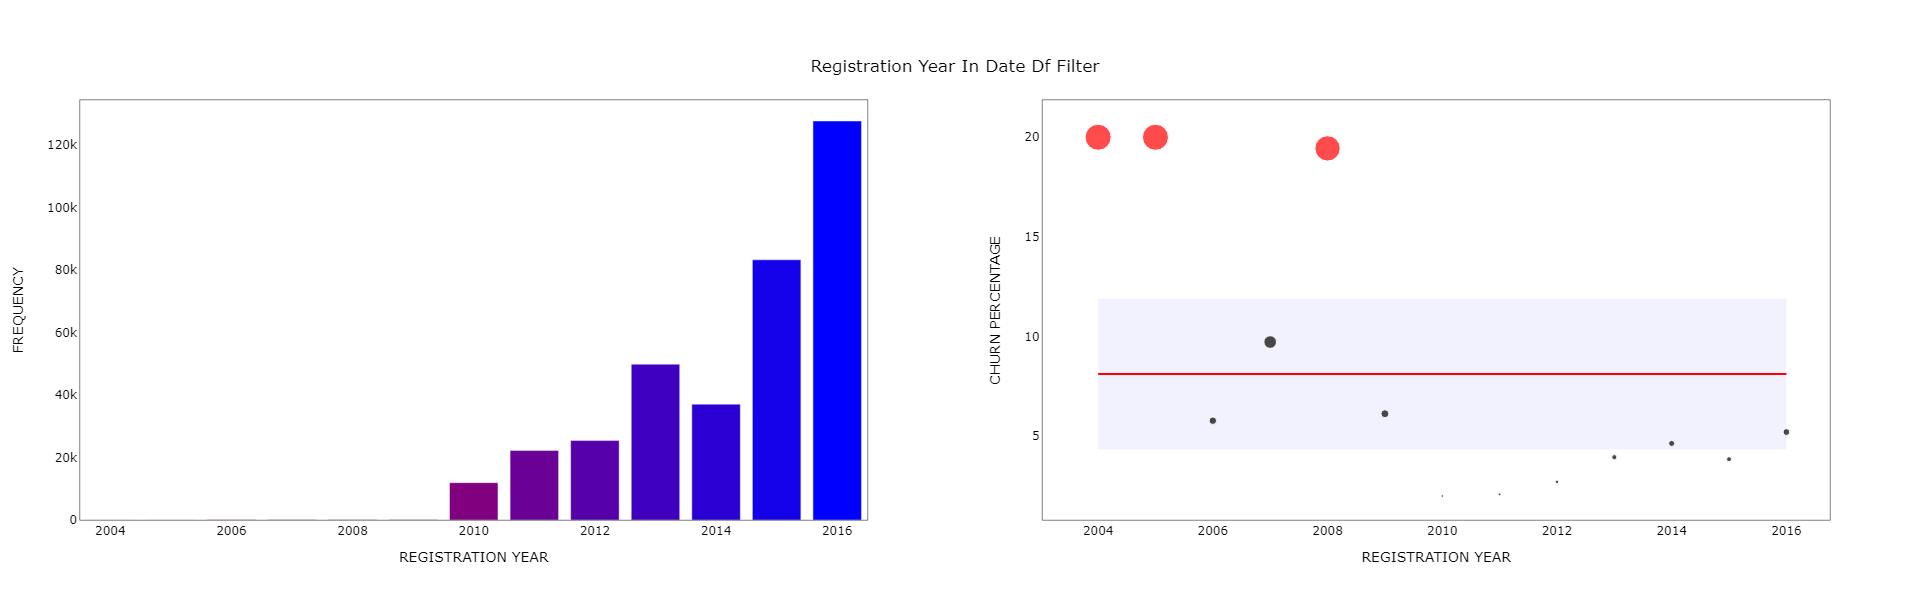

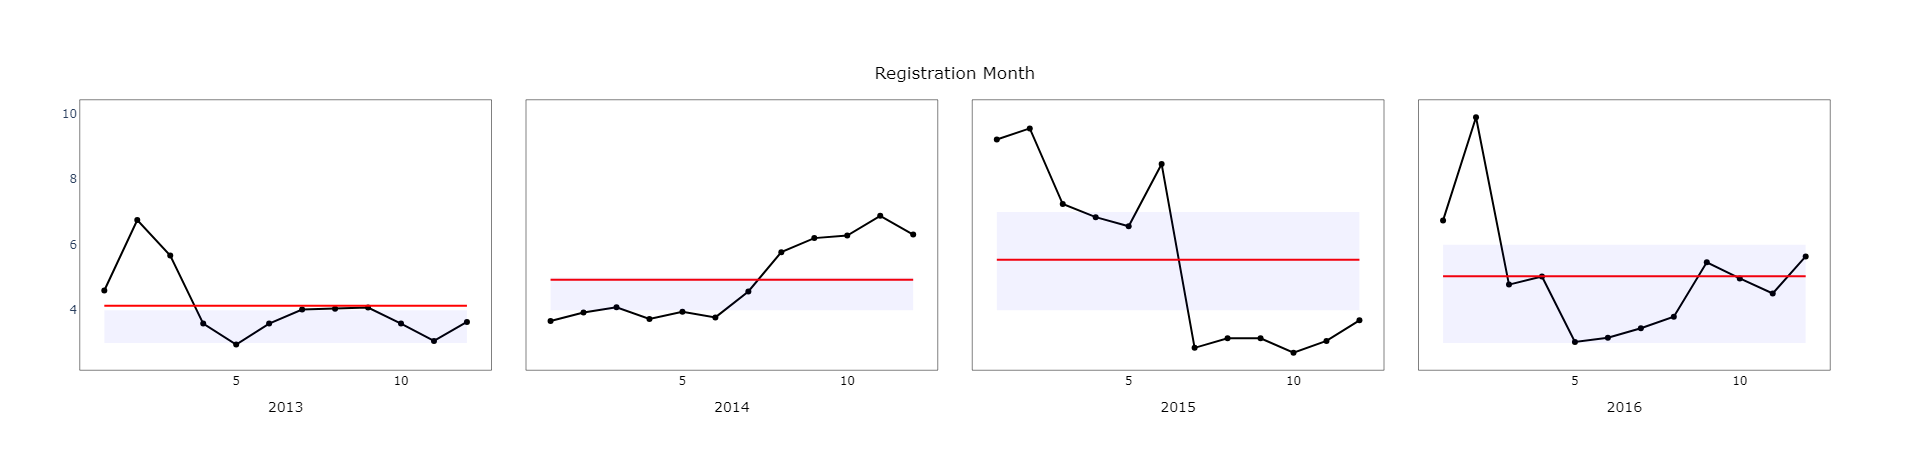

In [12]:
generate_charts(city_model_df)

<h4> 7-2-2- Payment Method ID</h4> 

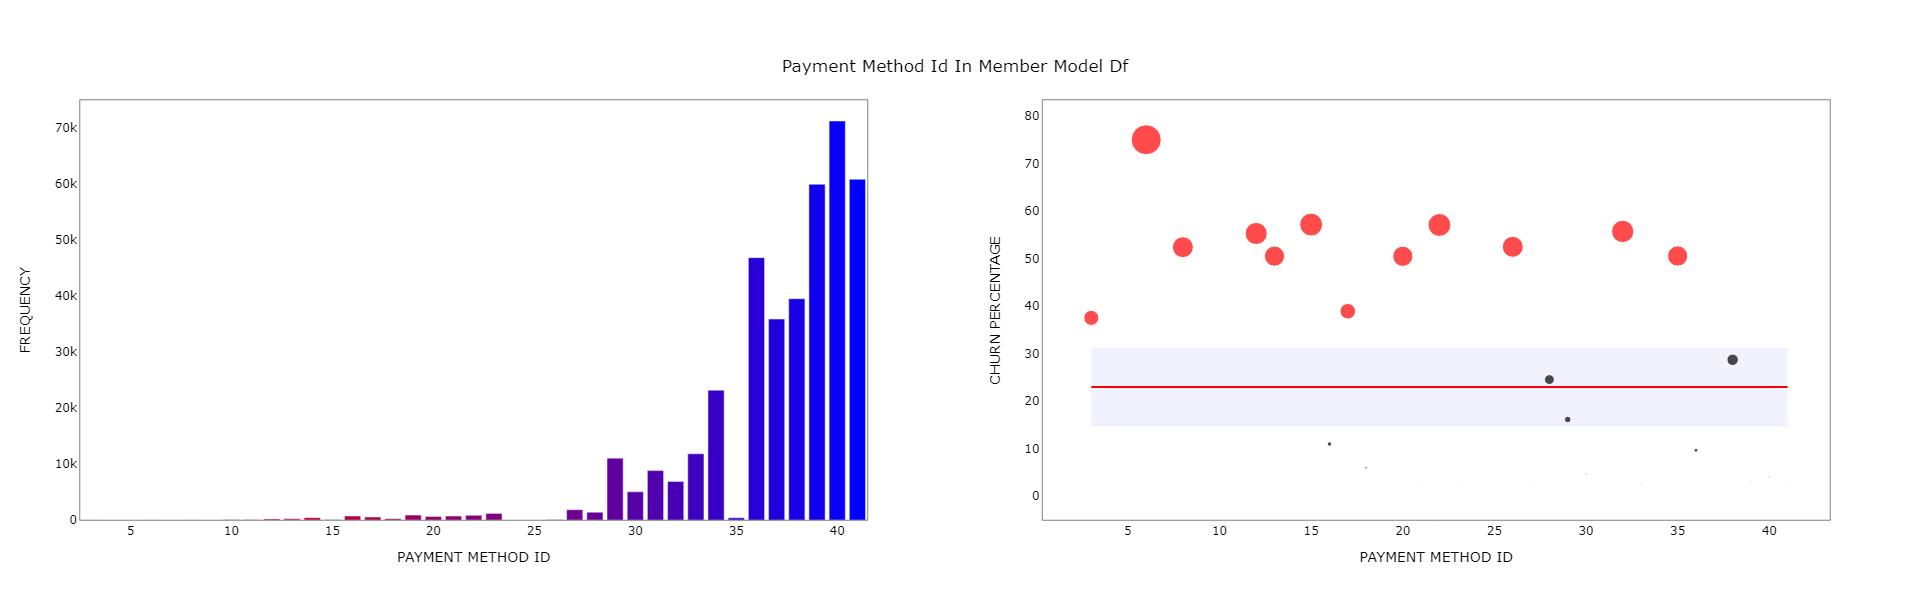

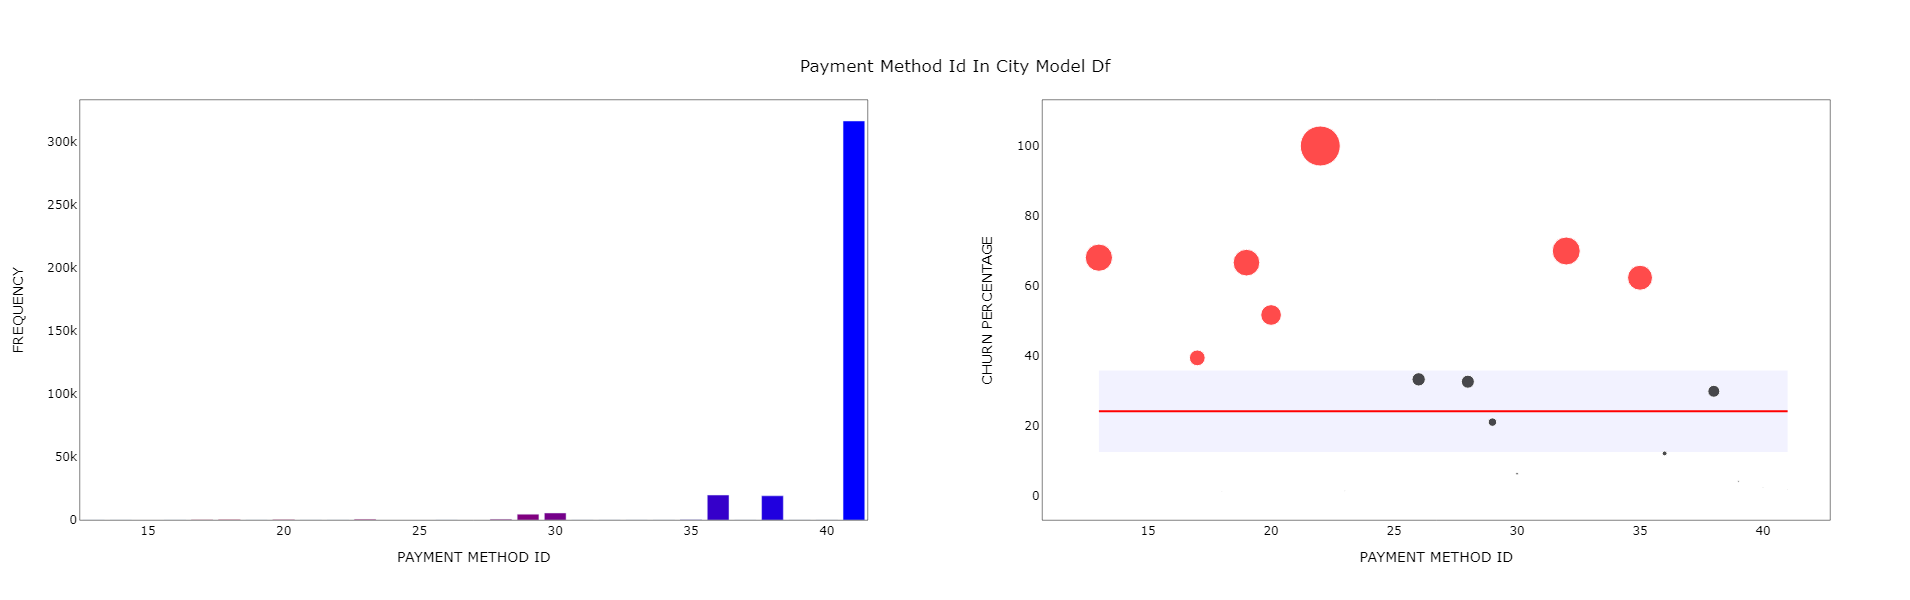

In [13]:
pk.bar_scatter_chart(member_model_df, 'payment_method_id', 0.4)
pk.bar_scatter_chart(city_model_df, 'payment_method_id', 0.4)

<h4> 8-2-2- Payment_Plan_Days</h4> 

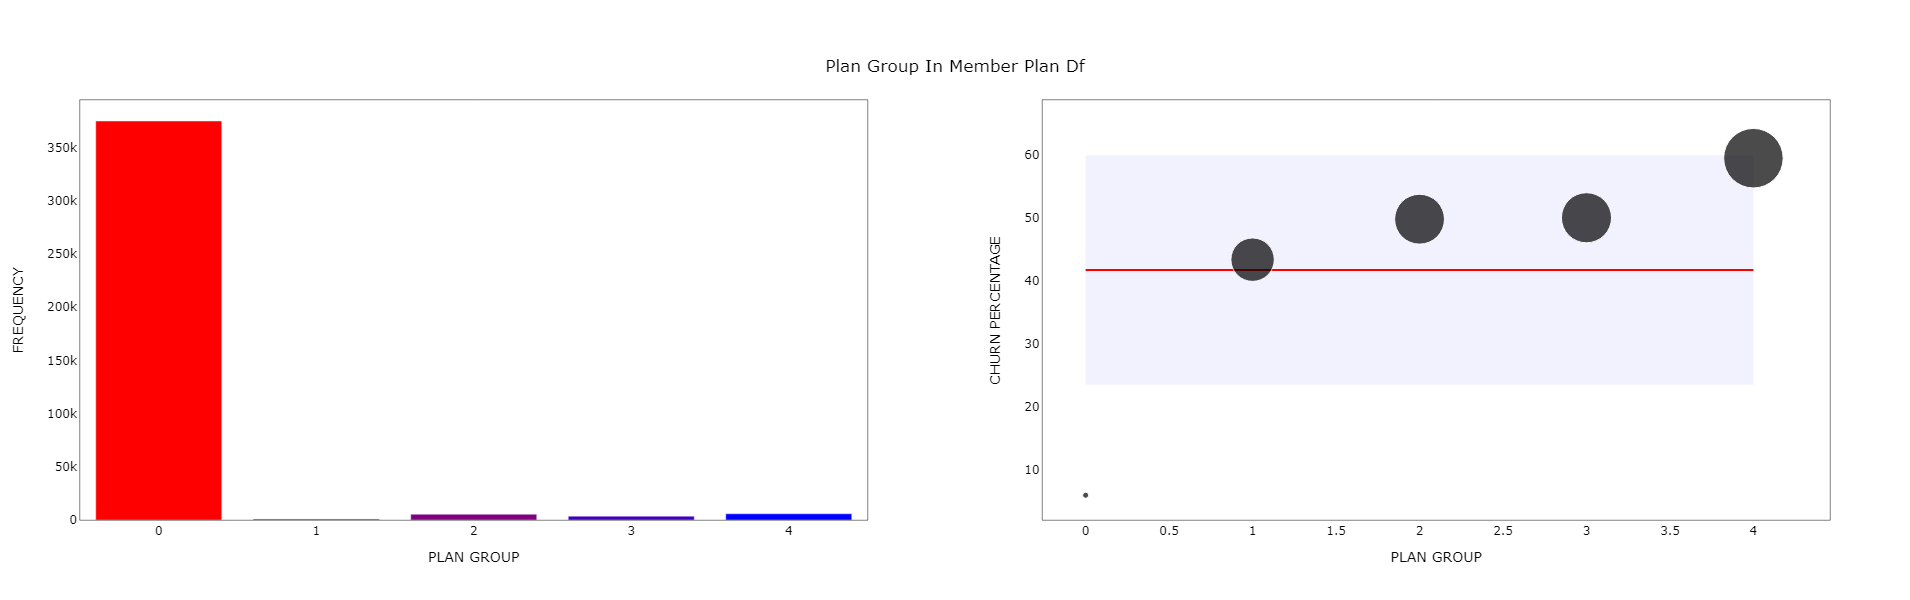

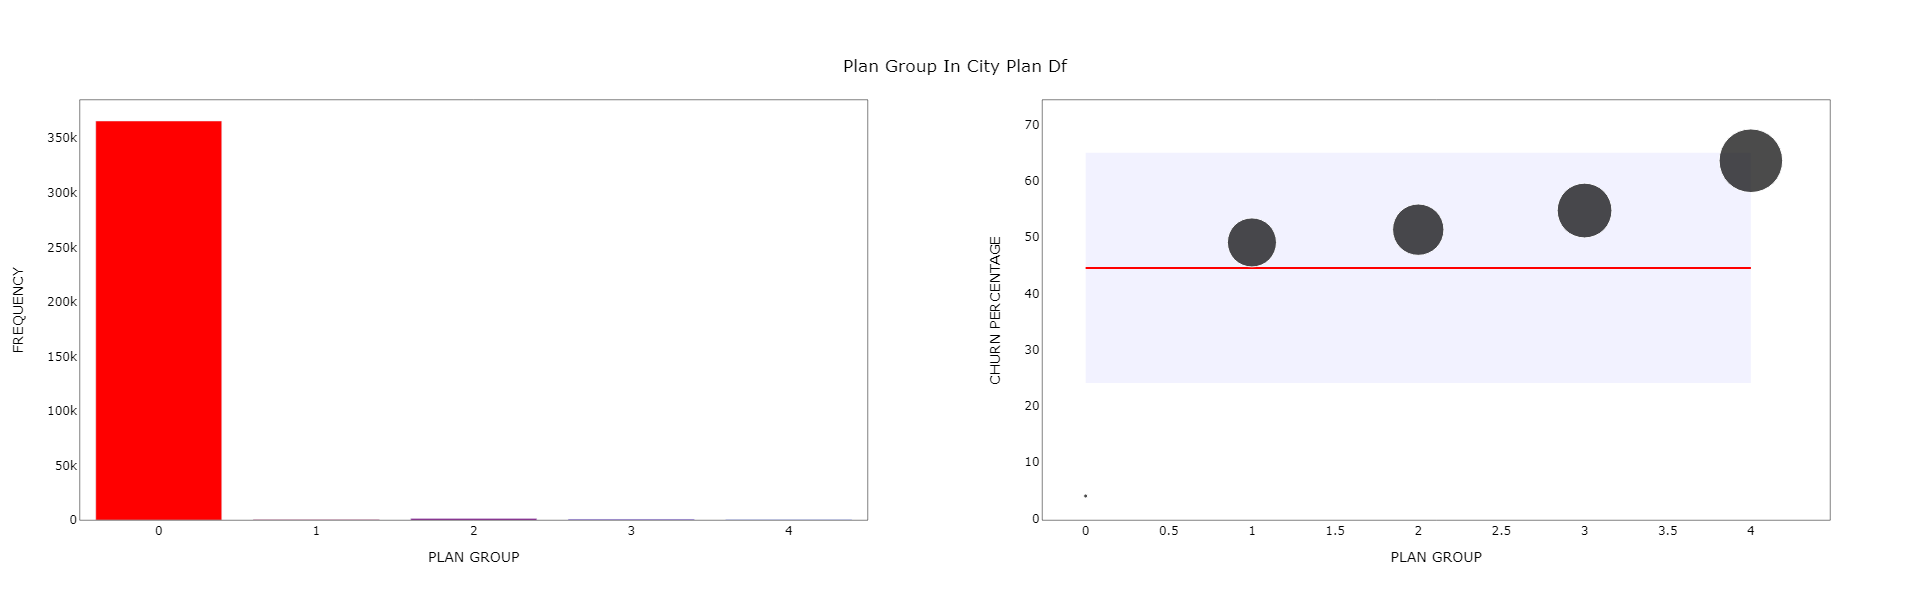

In [14]:
member_plan_df=pk.bucketized(member_model_df, 'payment_plan_days', 'plan_group', [31, 91, 181, 366])
pk.bar_scatter_chart(member_plan_df, 'plan_group', 1)

city_plan_df=pk.bucketized(city_model_df, 'payment_plan_days', 'plan_group', [31, 91, 181, 366])
pk.bar_scatter_chart(city_plan_df, 'plan_group', 1)

<h4> 9-2-2- Plan List Price</h4> 

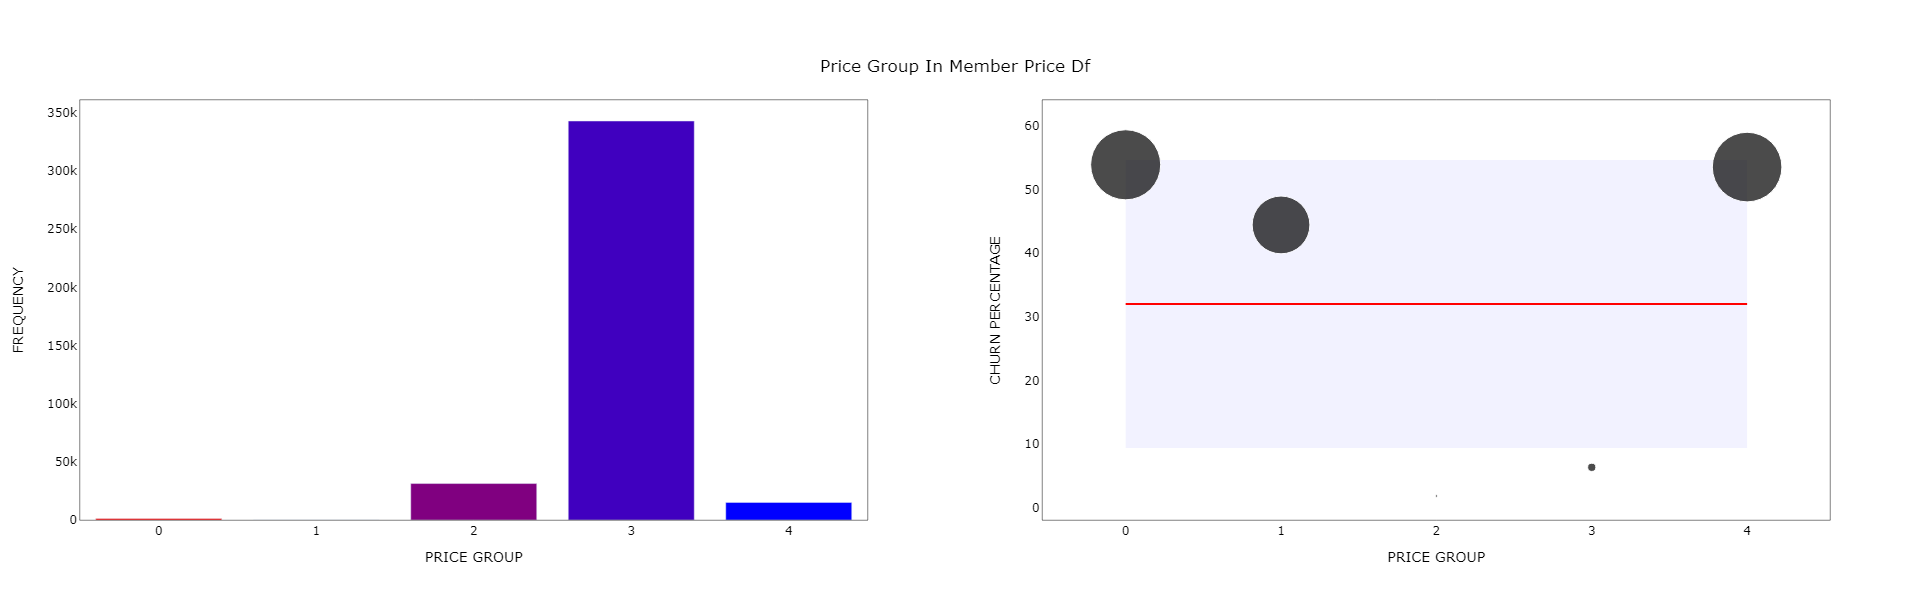

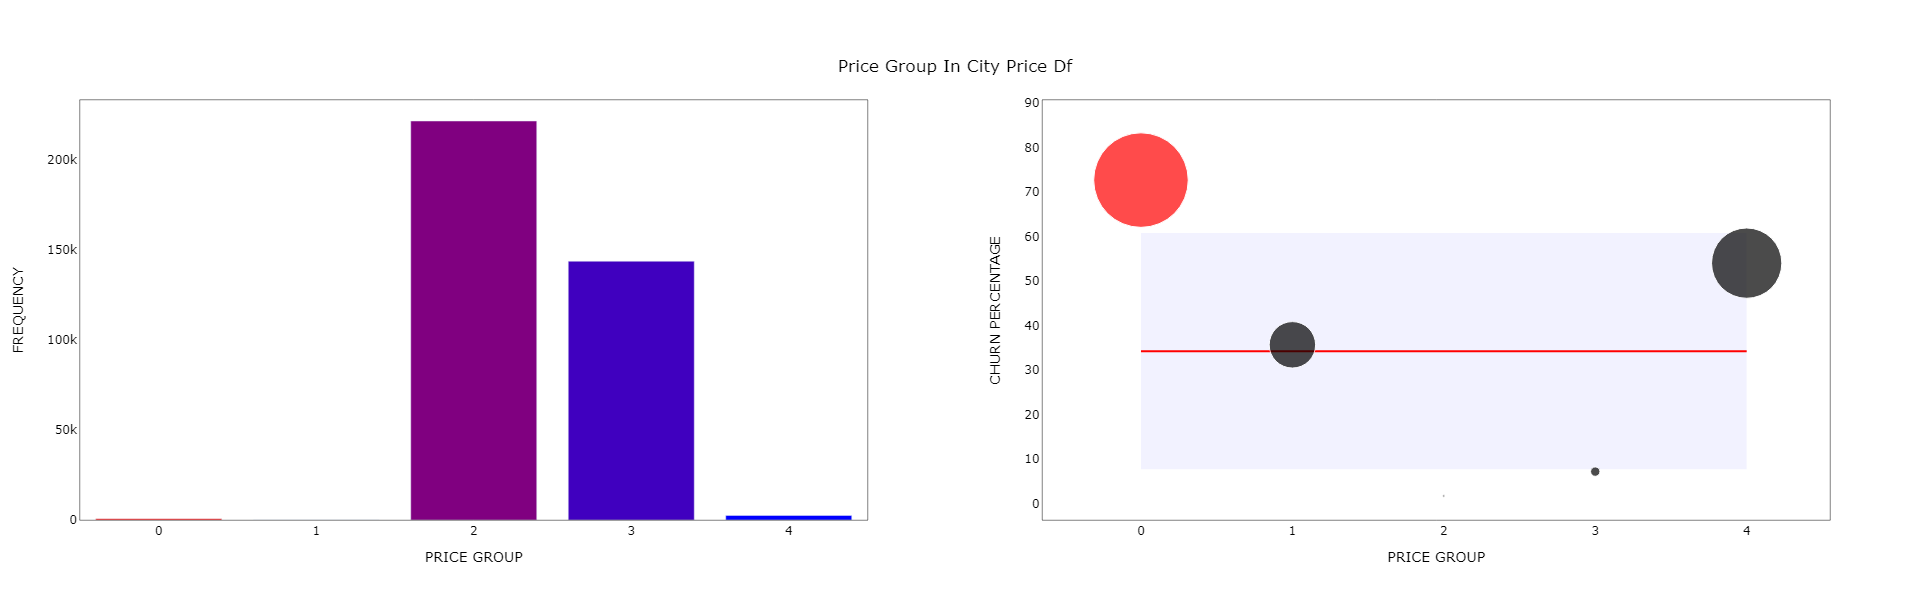

In [15]:
member_price_df=pk.bucketized(member_model_df, 'plan_list_price', 'price_group', [1, 51, 101, 201])
pk.bar_scatter_chart(member_price_df, 'price_group')

city_price_df=pk.bucketized(city_model_df, 'plan_list_price', 'price_group', [1, 51, 101, 201])
pk.bar_scatter_chart(city_price_df, 'price_group')

<h4> 10-2-2- Actual Amount Paid</h4> 

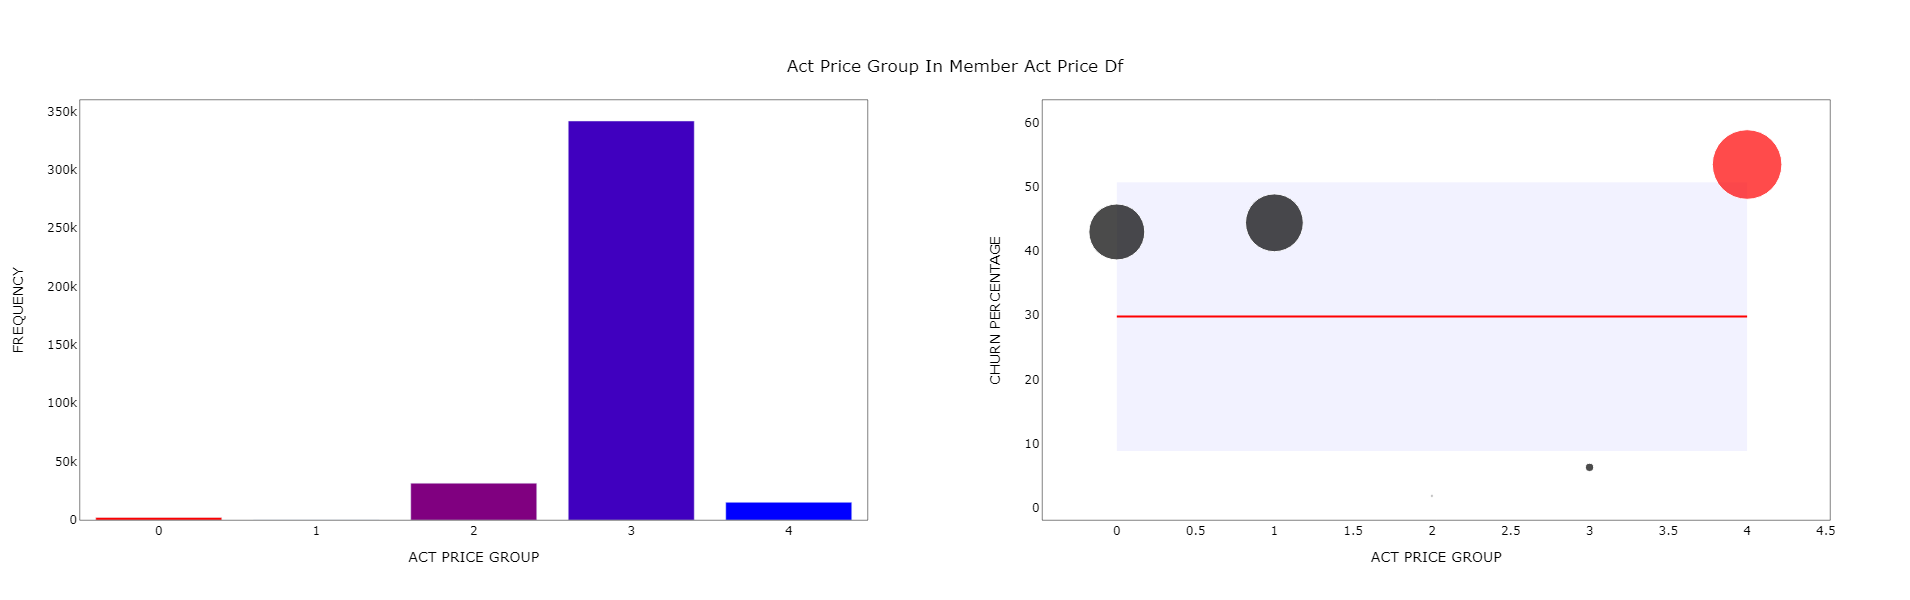

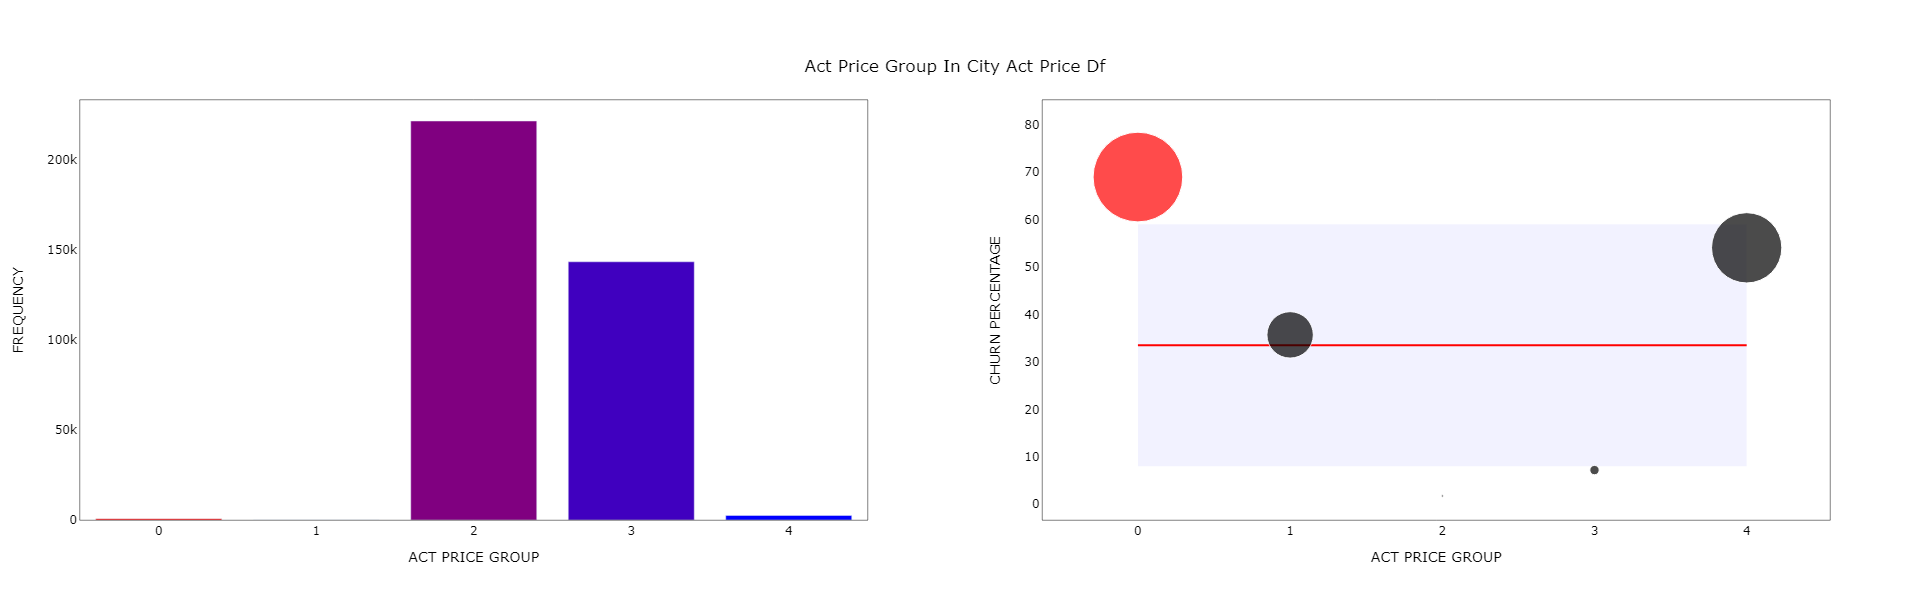

In [16]:
member_act_price_df=pk.bucketized(member_model_df, 'actual_amount_paid', 'act_price_group', [1, 51, 101, 201])
pk.bar_scatter_chart(member_act_price_df, 'act_price_group')
city_act_price_df=pk.bucketized(city_model_df, 'actual_amount_paid', 'act_price_group', [1, 51, 101, 201])
pk.bar_scatter_chart(city_act_price_df, 'act_price_group')

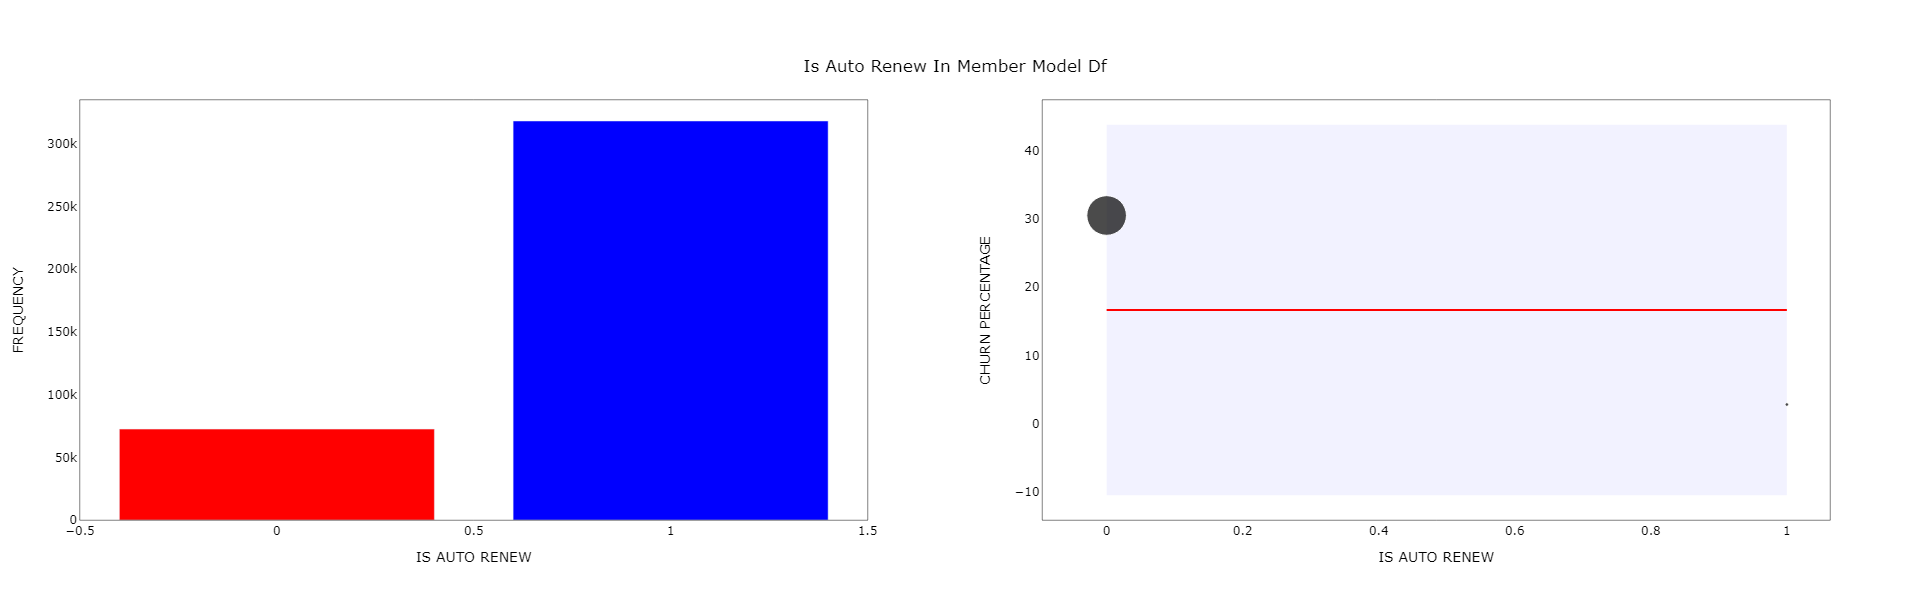

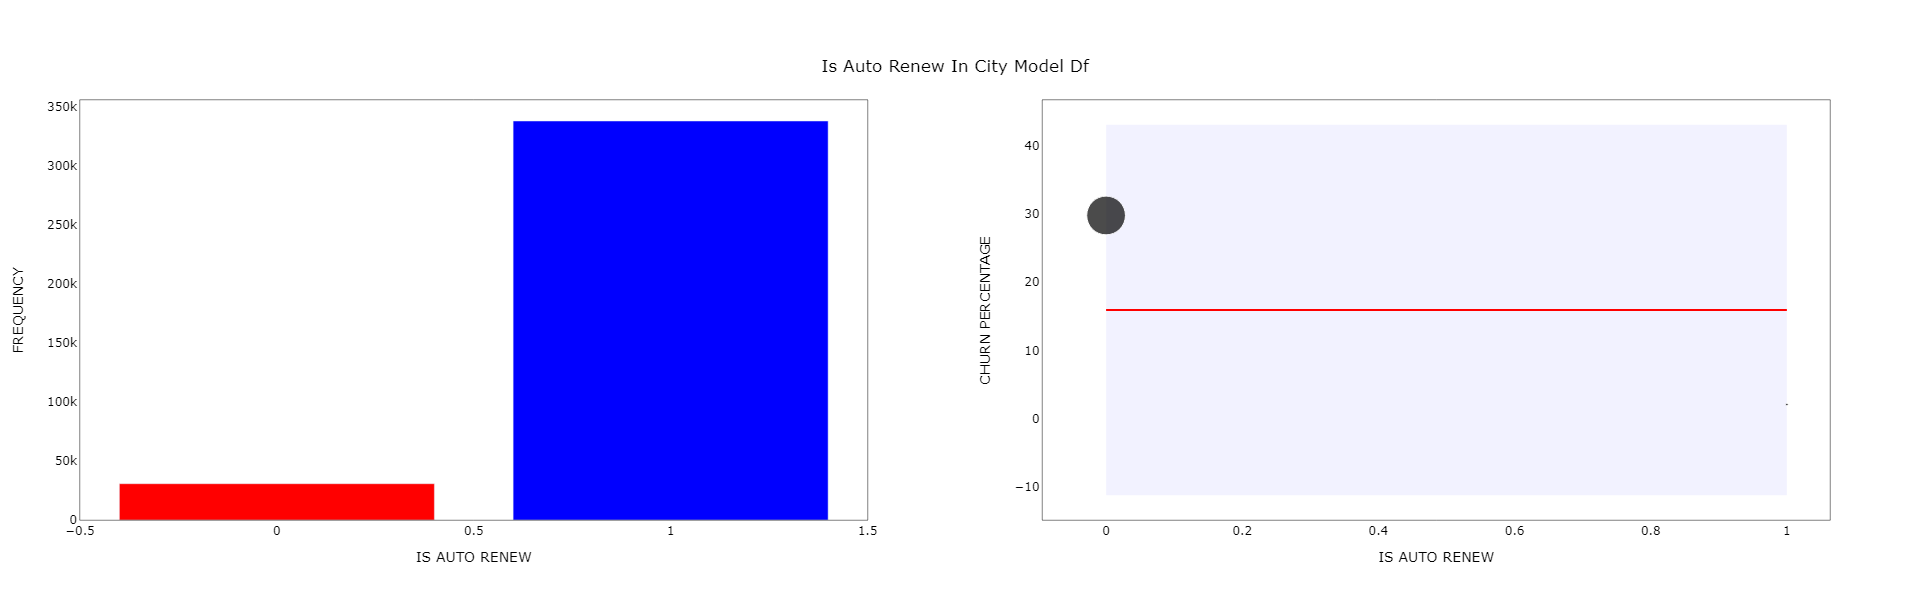

In [17]:
pk.bar_scatter_chart(member_model_df, 'is_auto_renew')
pk.bar_scatter_chart(city_model_df, 'is_auto_renew')

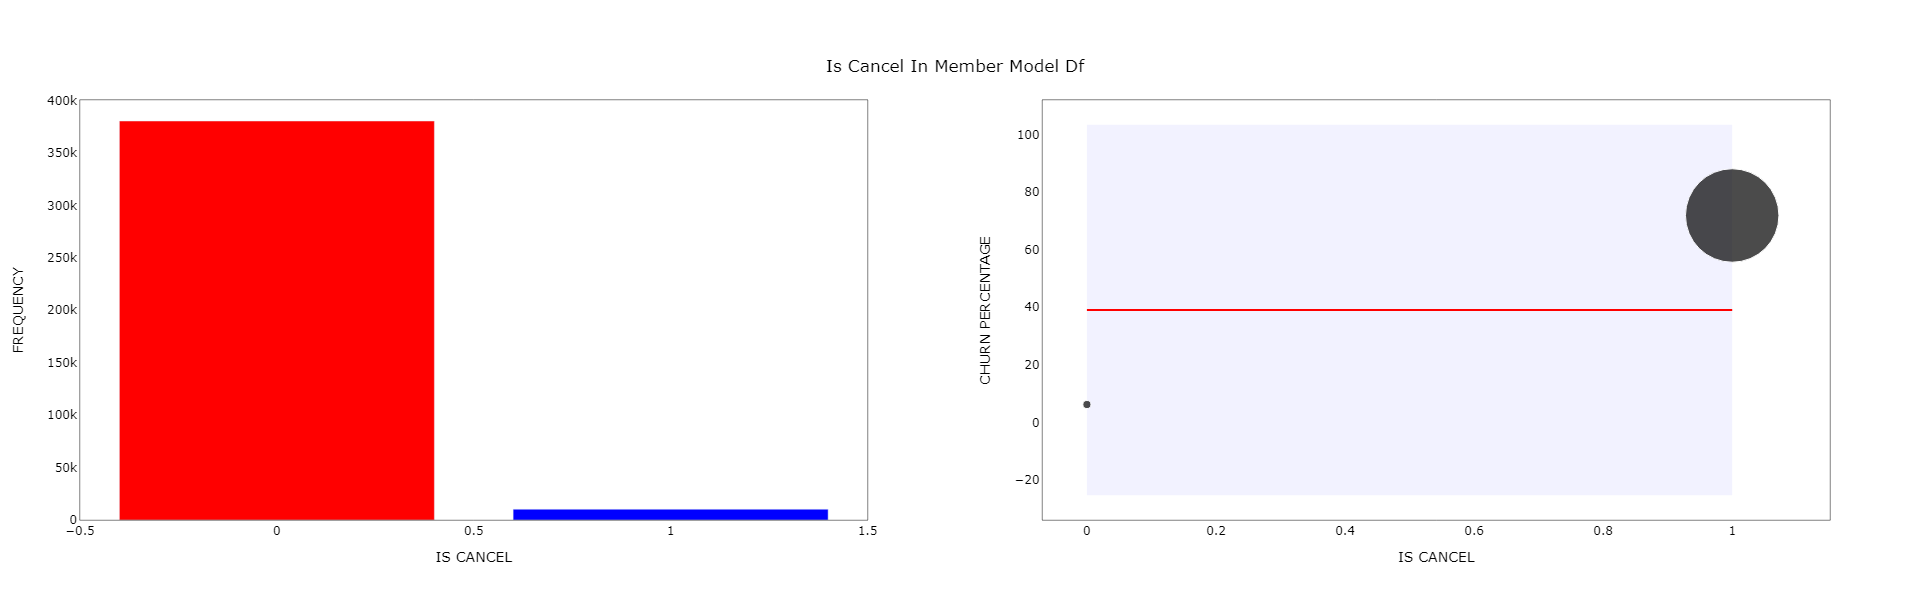

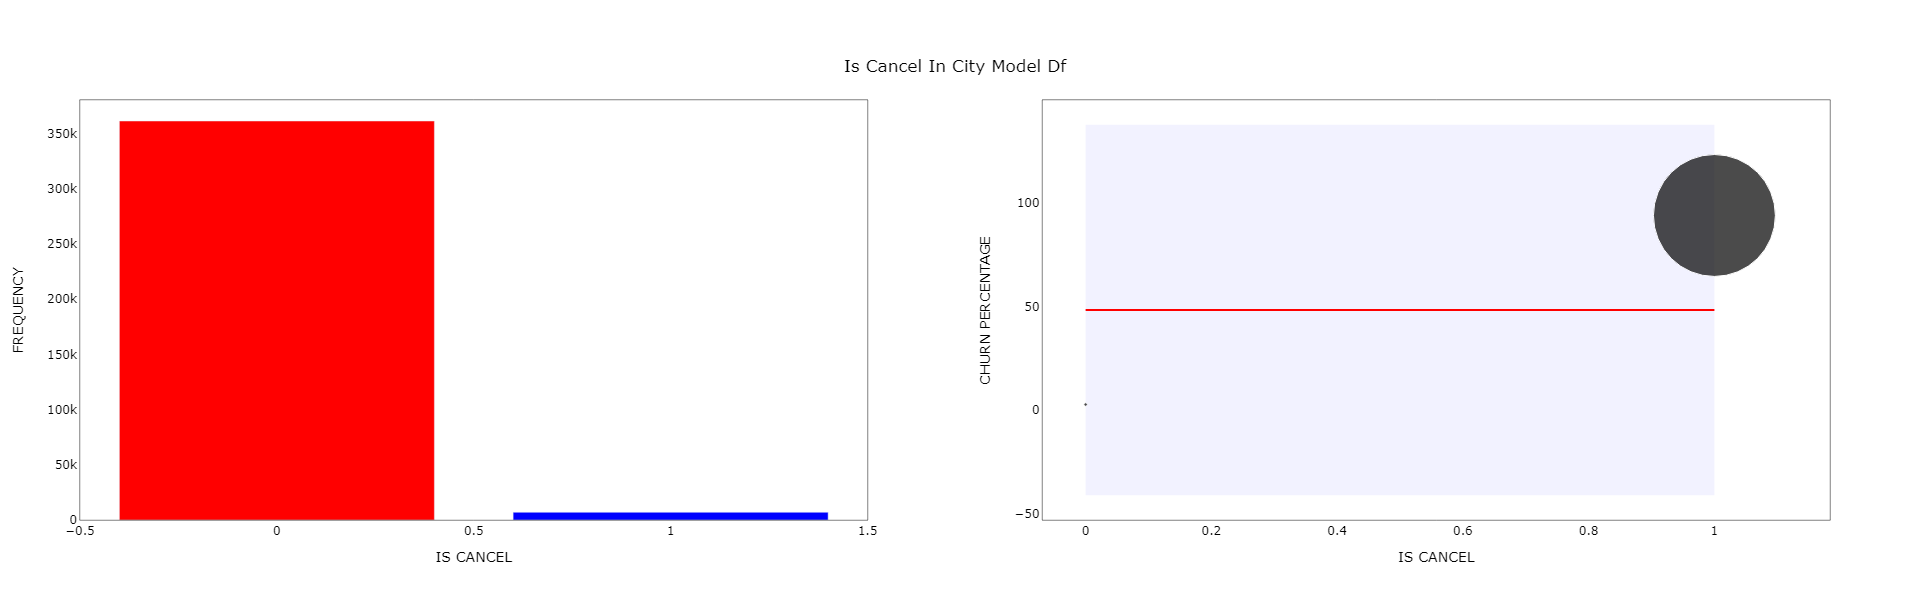

In [18]:
pk.bar_scatter_chart(member_model_df, 'is_cancel')
pk.bar_scatter_chart(city_model_df, 'is_cancel')

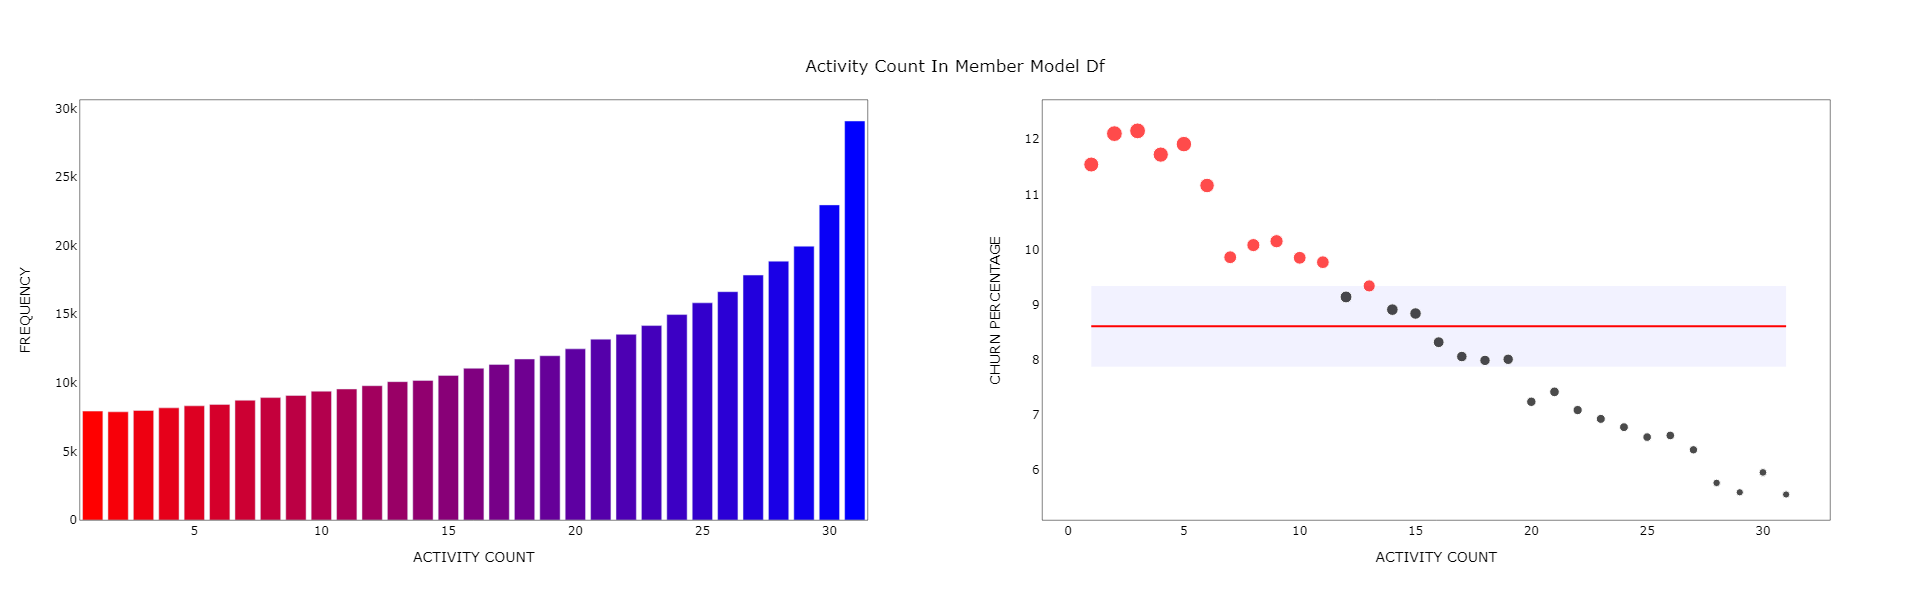

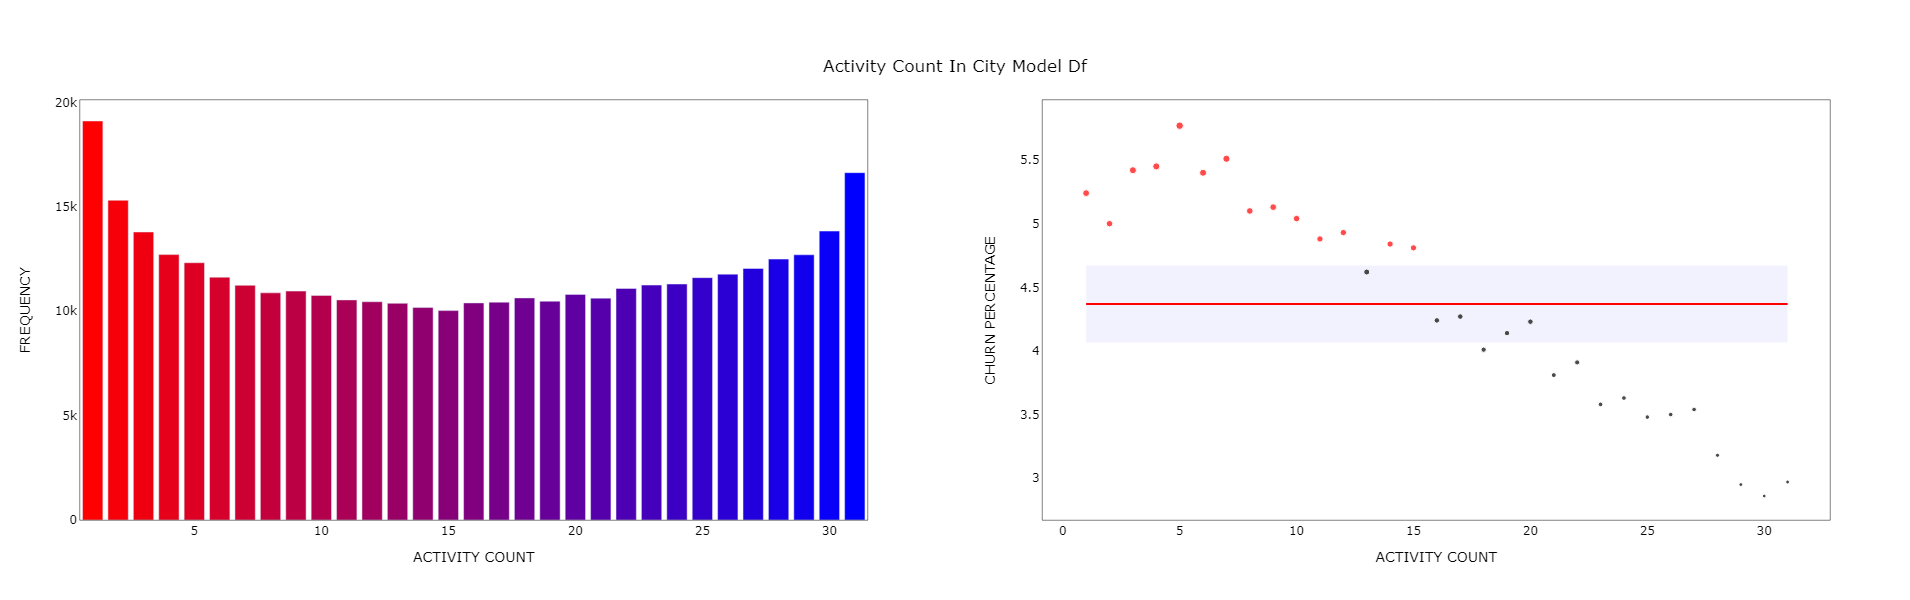

In [19]:
pk.bar_scatter_chart(member_model_df, 'activity_count')
pk.bar_scatter_chart(city_model_df, 'activity_count')

In [20]:
def sum_plot(df, param, group_param, bins=[101, 1001, 100]):
    sum_df=pk.bucketized(df, param, group_param, bins)
    pk.bar_scatter_chart(sum_df, group_param)

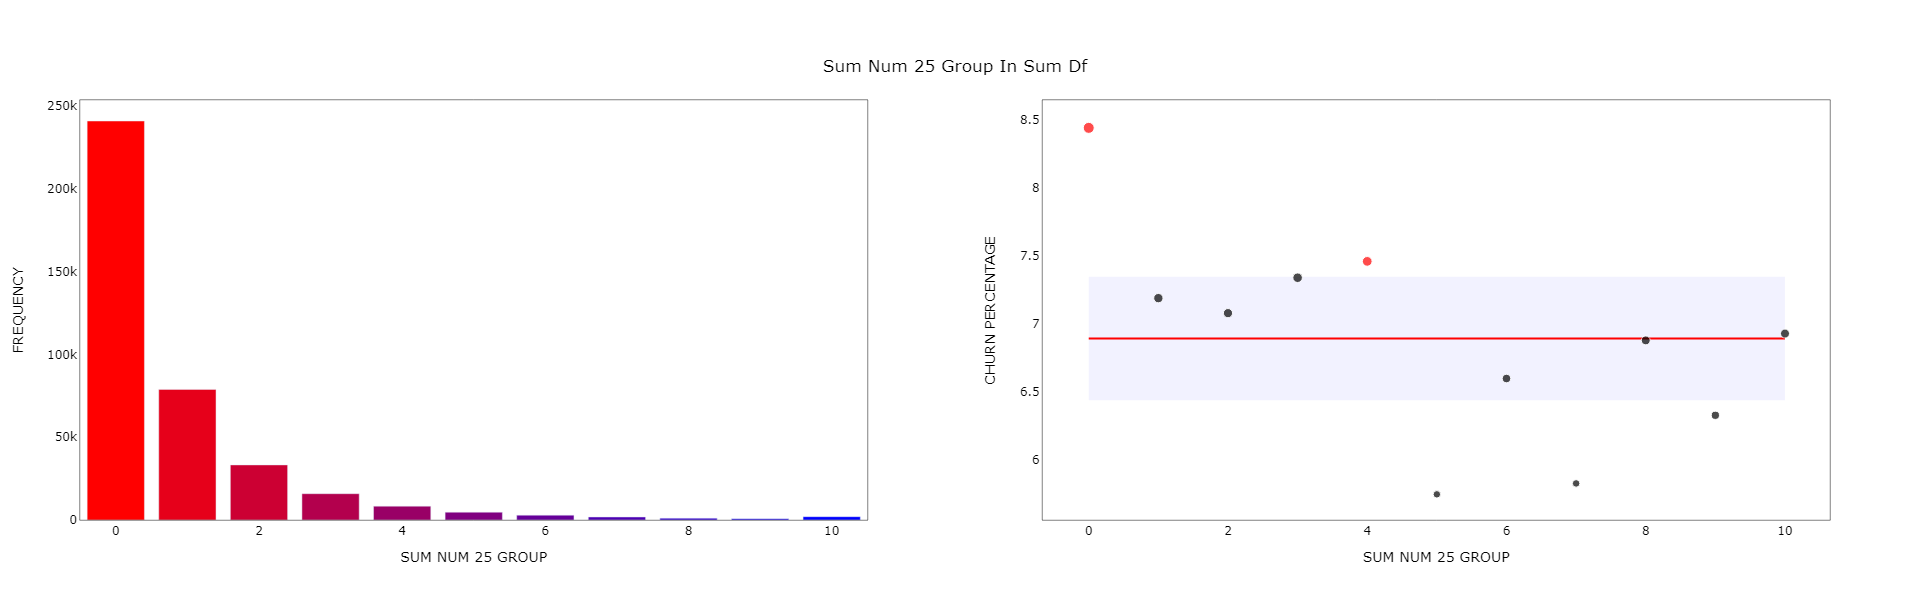

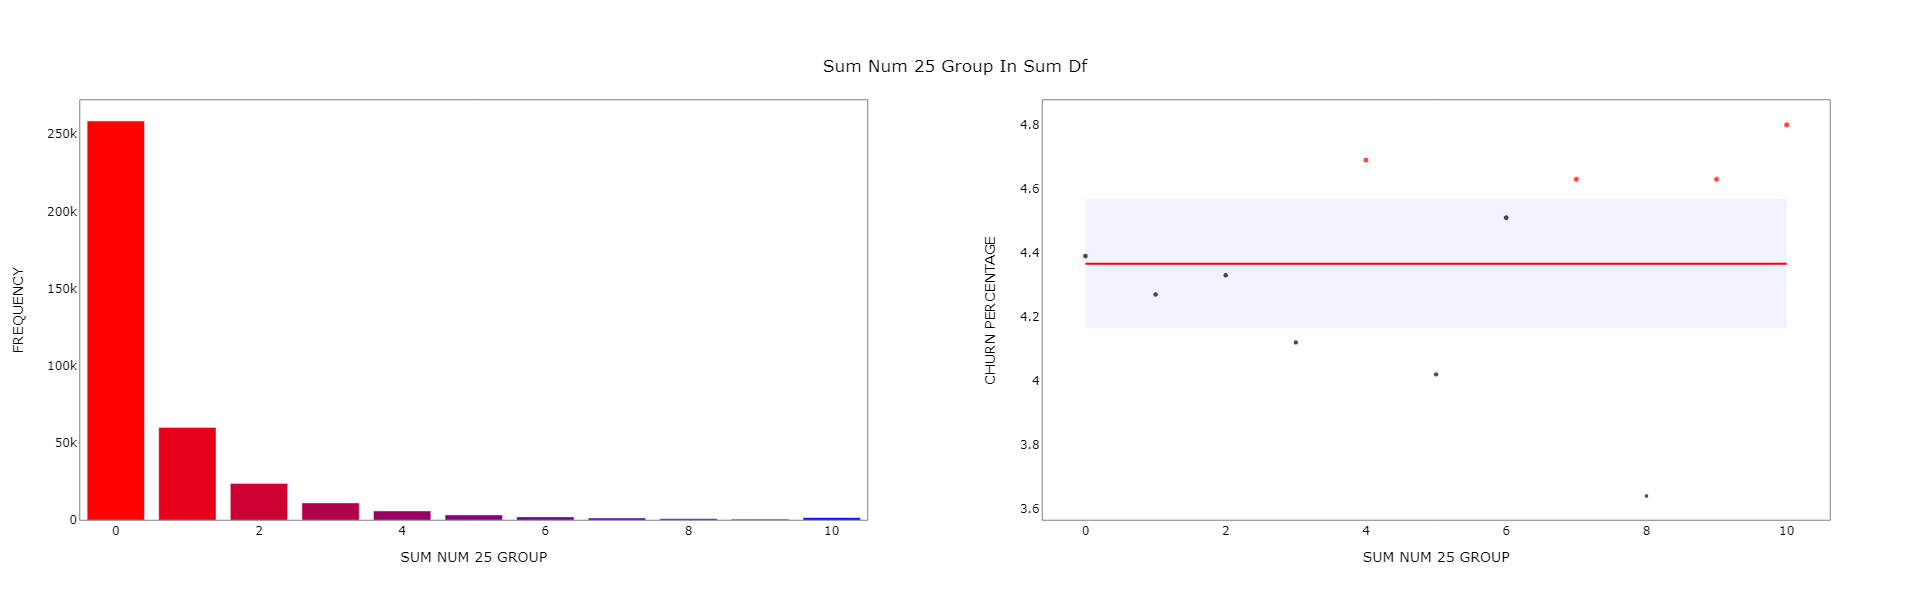

In [21]:
sum_plot(member_model_df, 'sum_num_25', 'sum_num_25_group')
sum_plot(city_model_df, 'sum_num_25', 'sum_num_25_group')

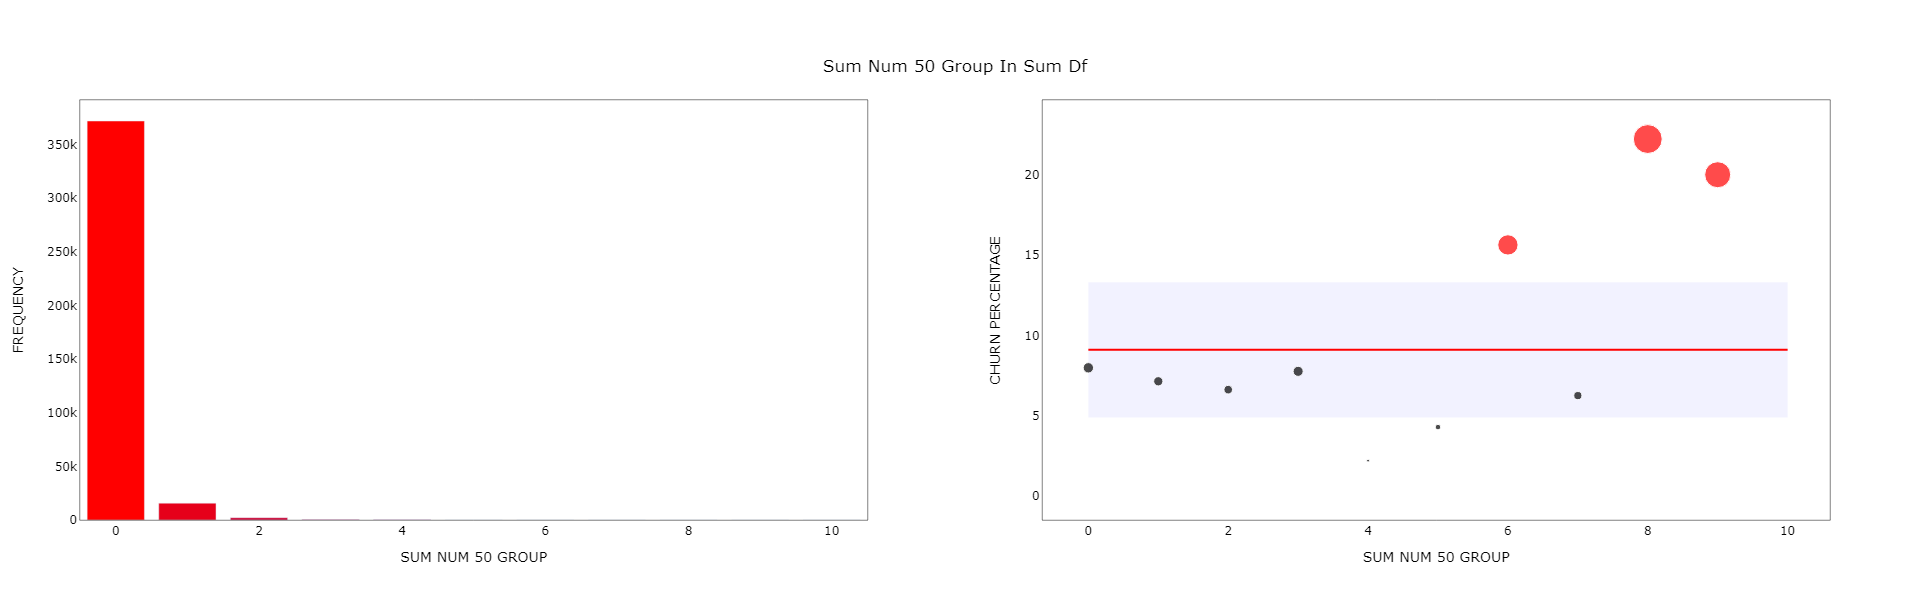

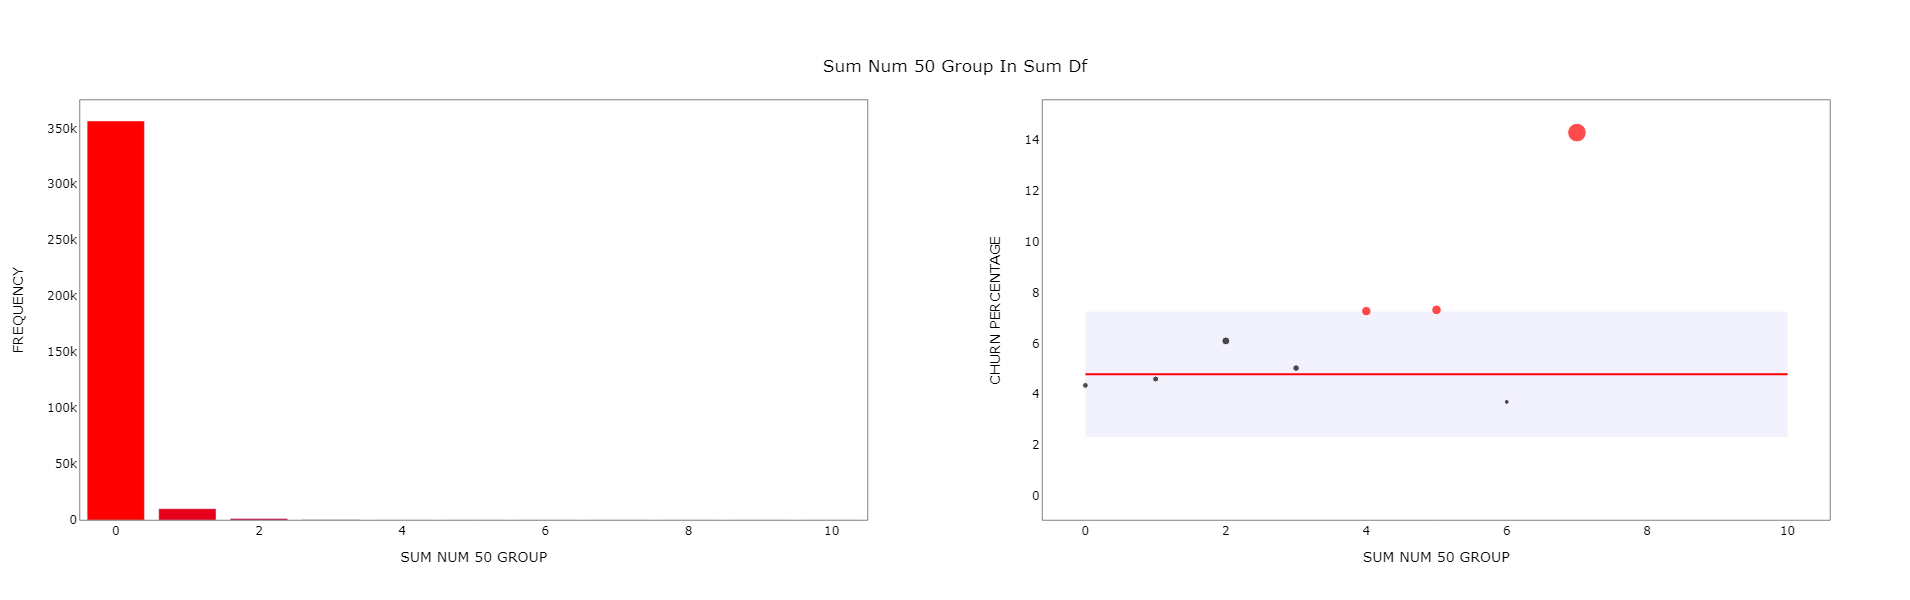

In [22]:
sum_plot(member_model_df, 'sum_num_50', 'sum_num_50_group')
sum_plot(city_model_df, 'sum_num_50', 'sum_num_50_group')

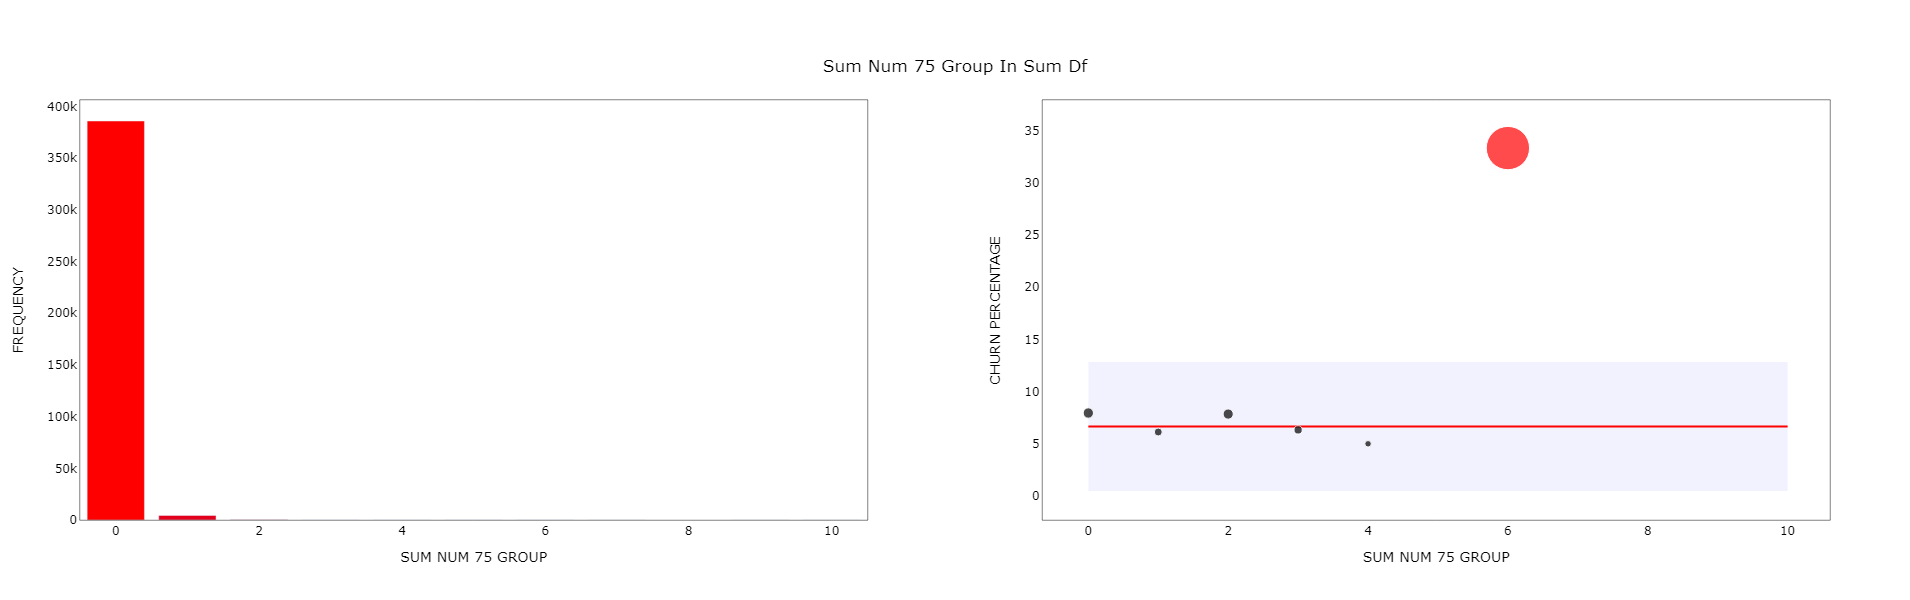

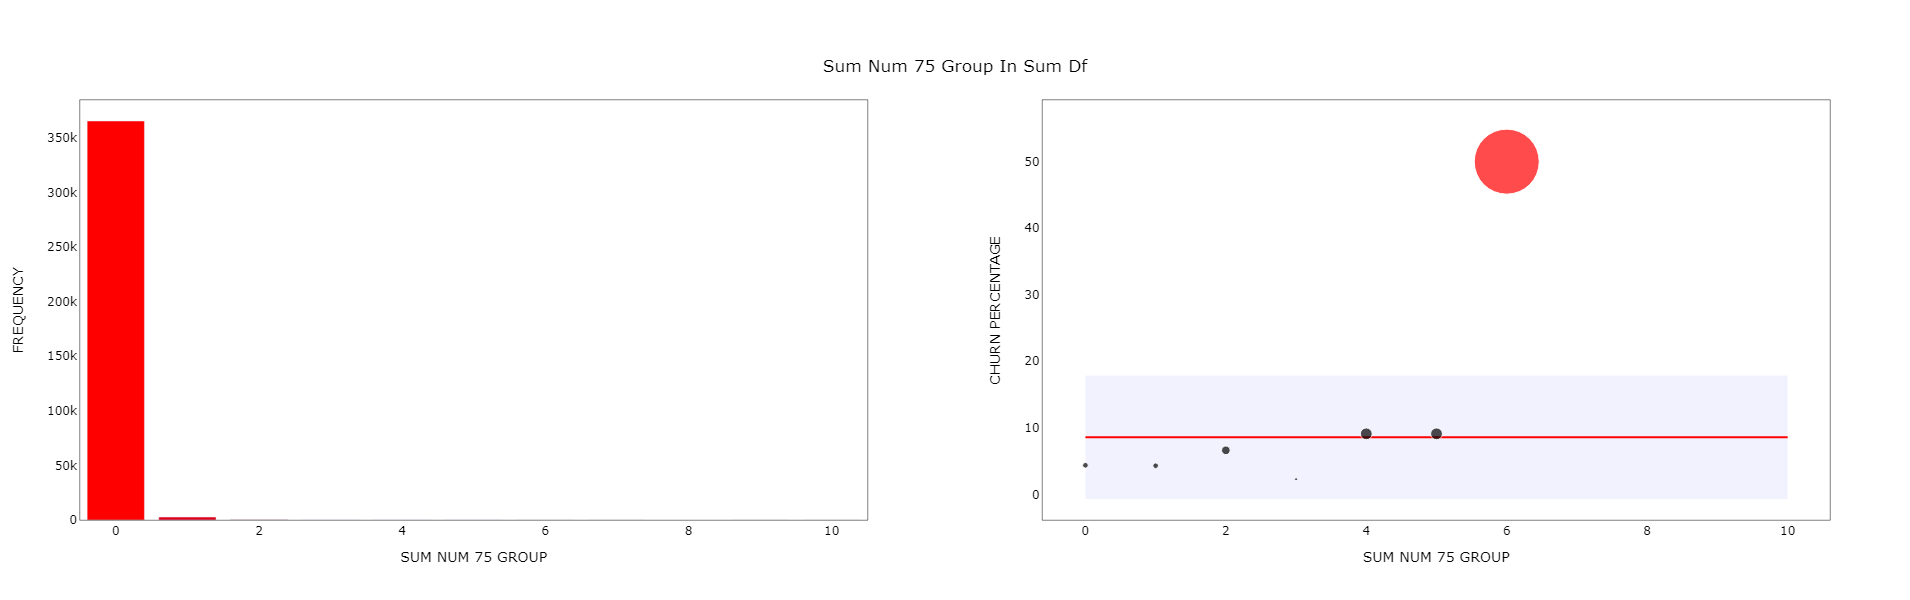

In [23]:
sum_plot(member_model_df, 'sum_num_75', 'sum_num_75_group')
sum_plot(city_model_df, 'sum_num_75', 'sum_num_75_group')

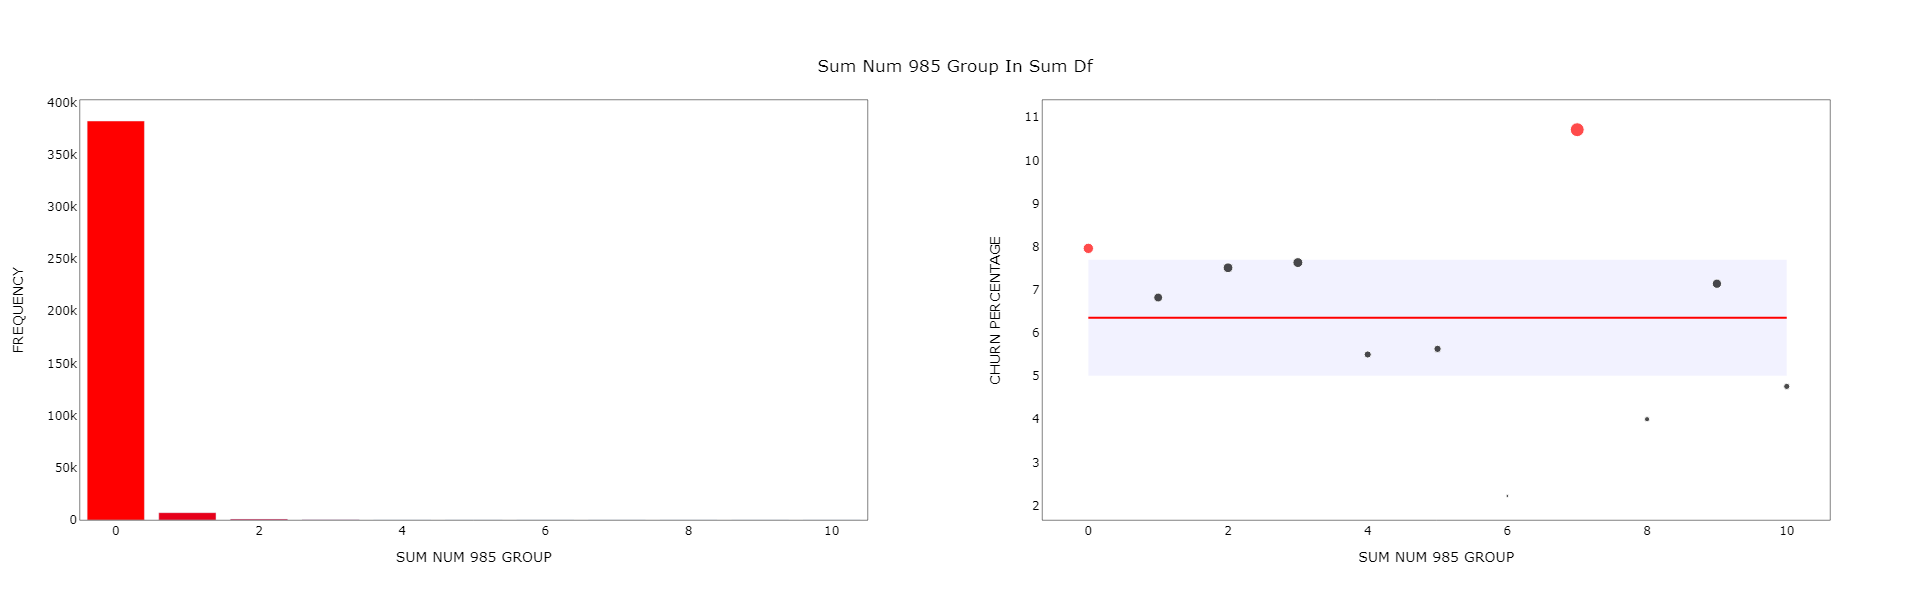

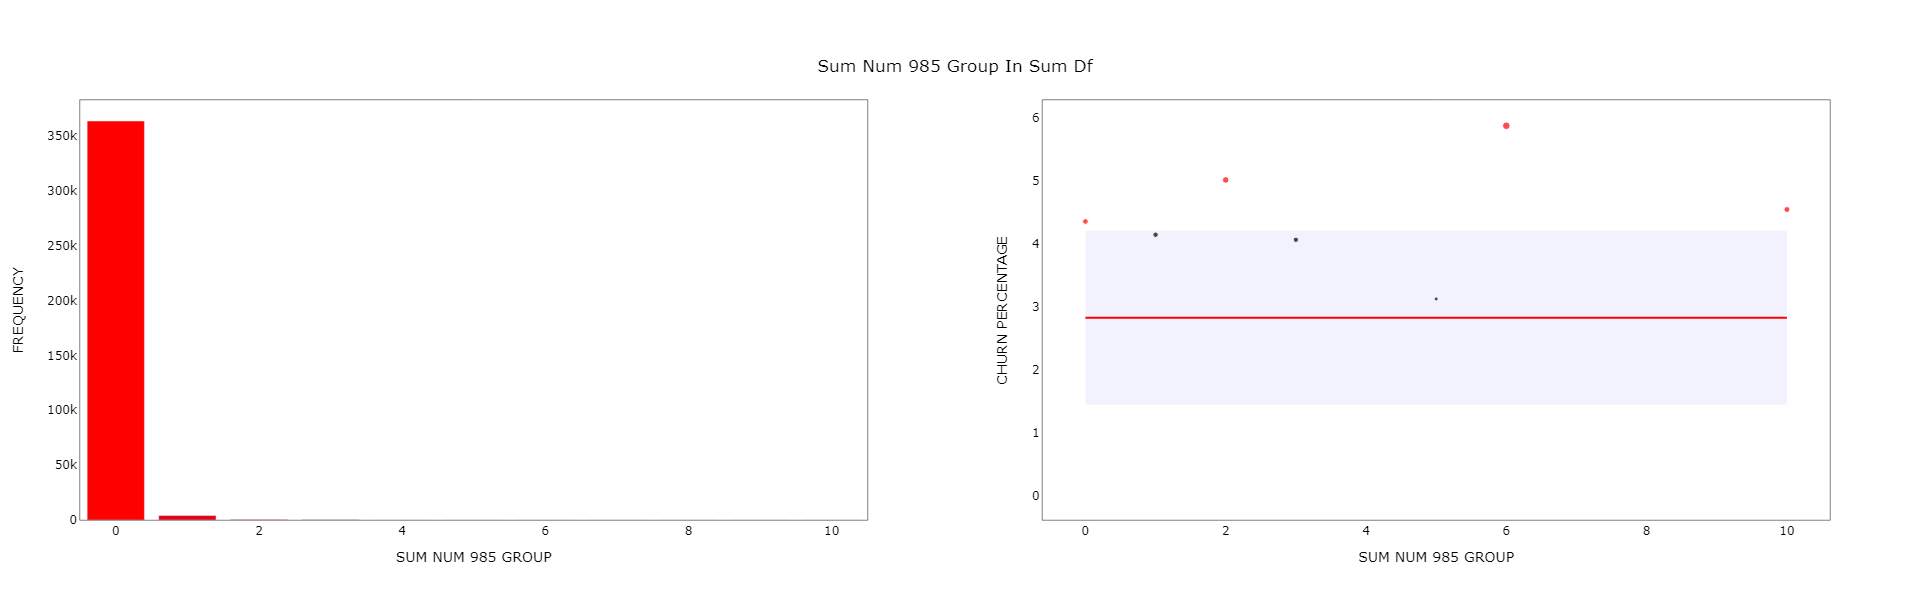

In [24]:
sum_plot(member_model_df, 'sum_num_985', 'sum_num_985_group')
sum_plot(city_model_df, 'sum_num_985', 'sum_num_985_group')

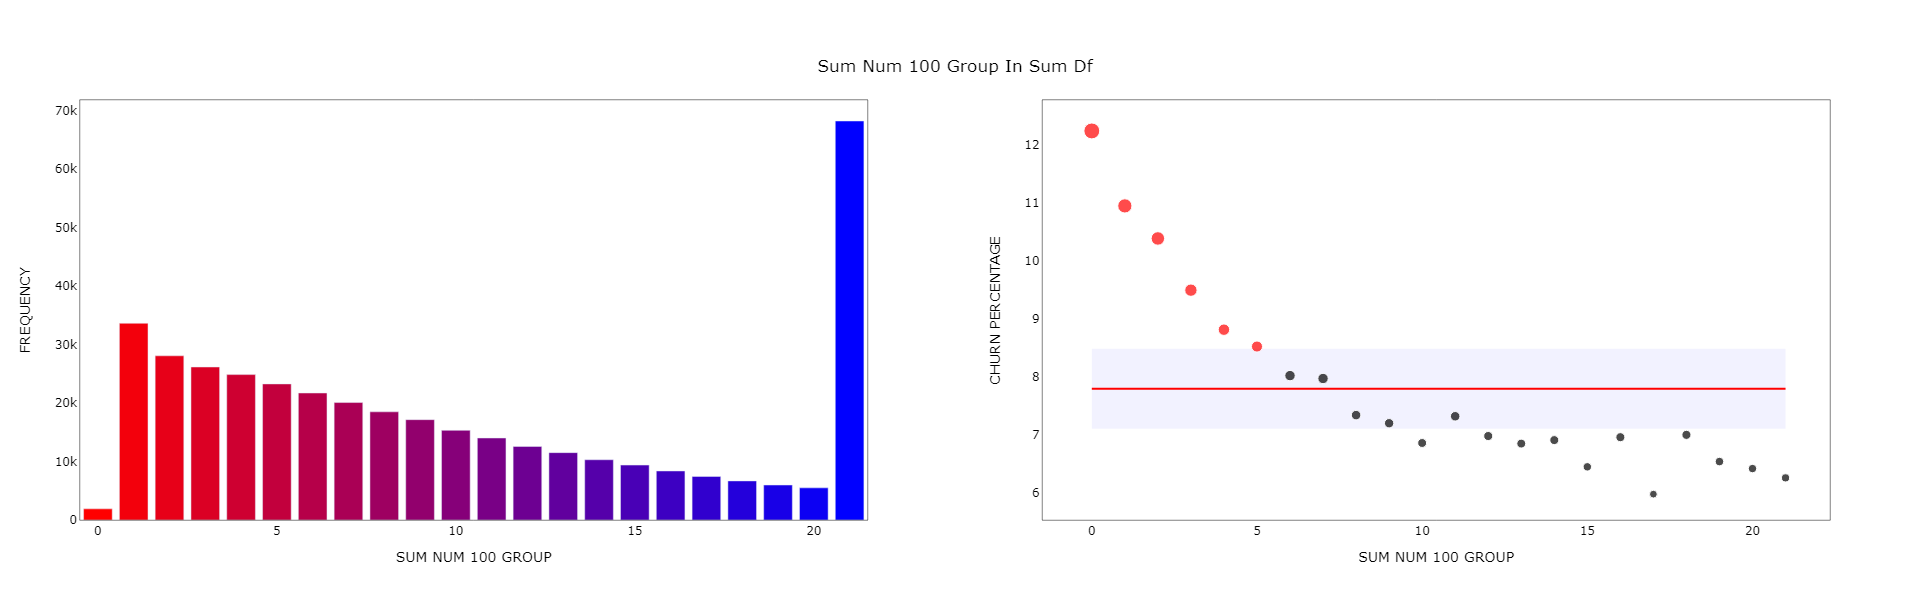

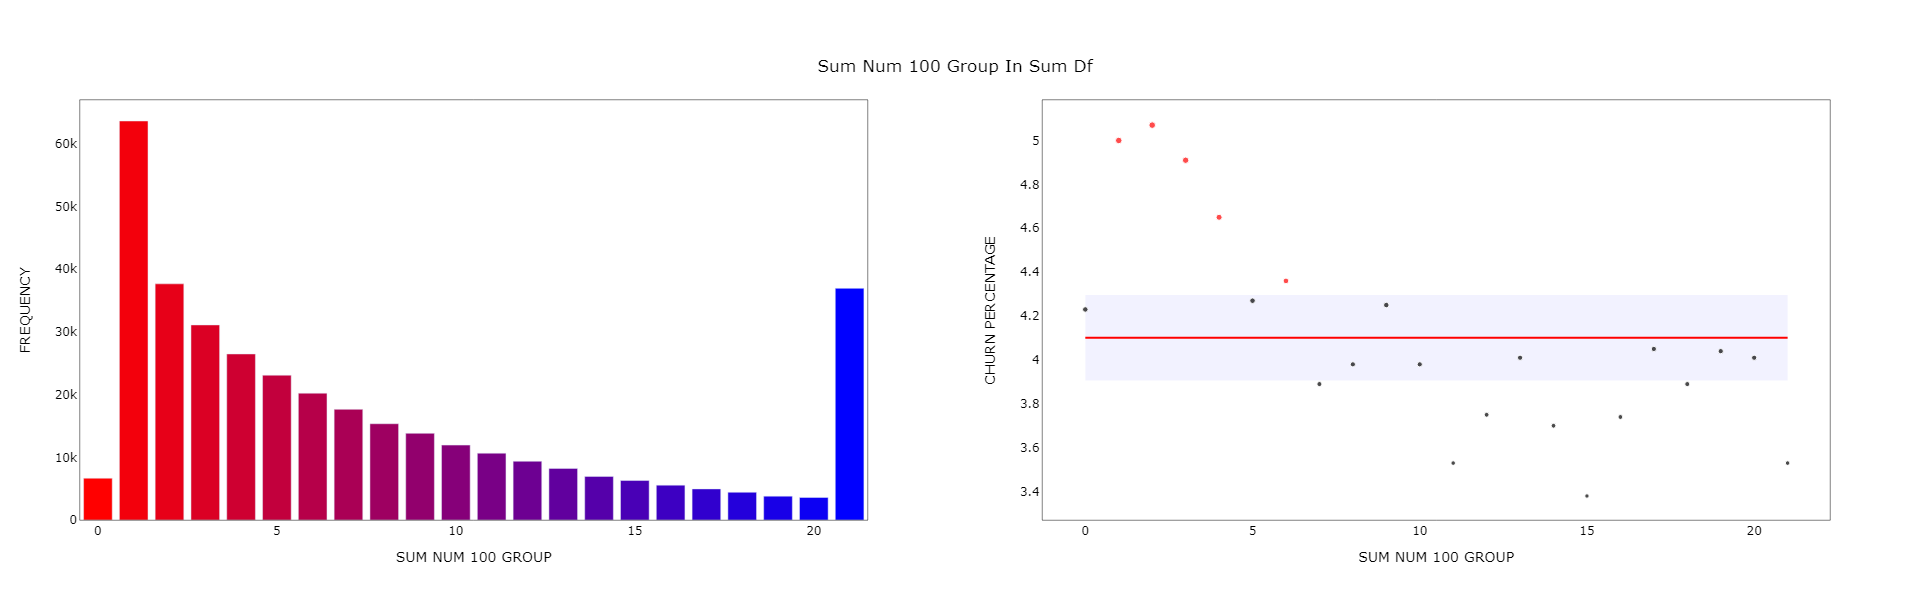

In [25]:
sum_plot(member_model_df, 'sum_num_100', 'sum_num_100_group', [1,1000,50])
sum_plot(city_model_df, 'sum_num_100', 'sum_num_100_group', [1,1000,50])

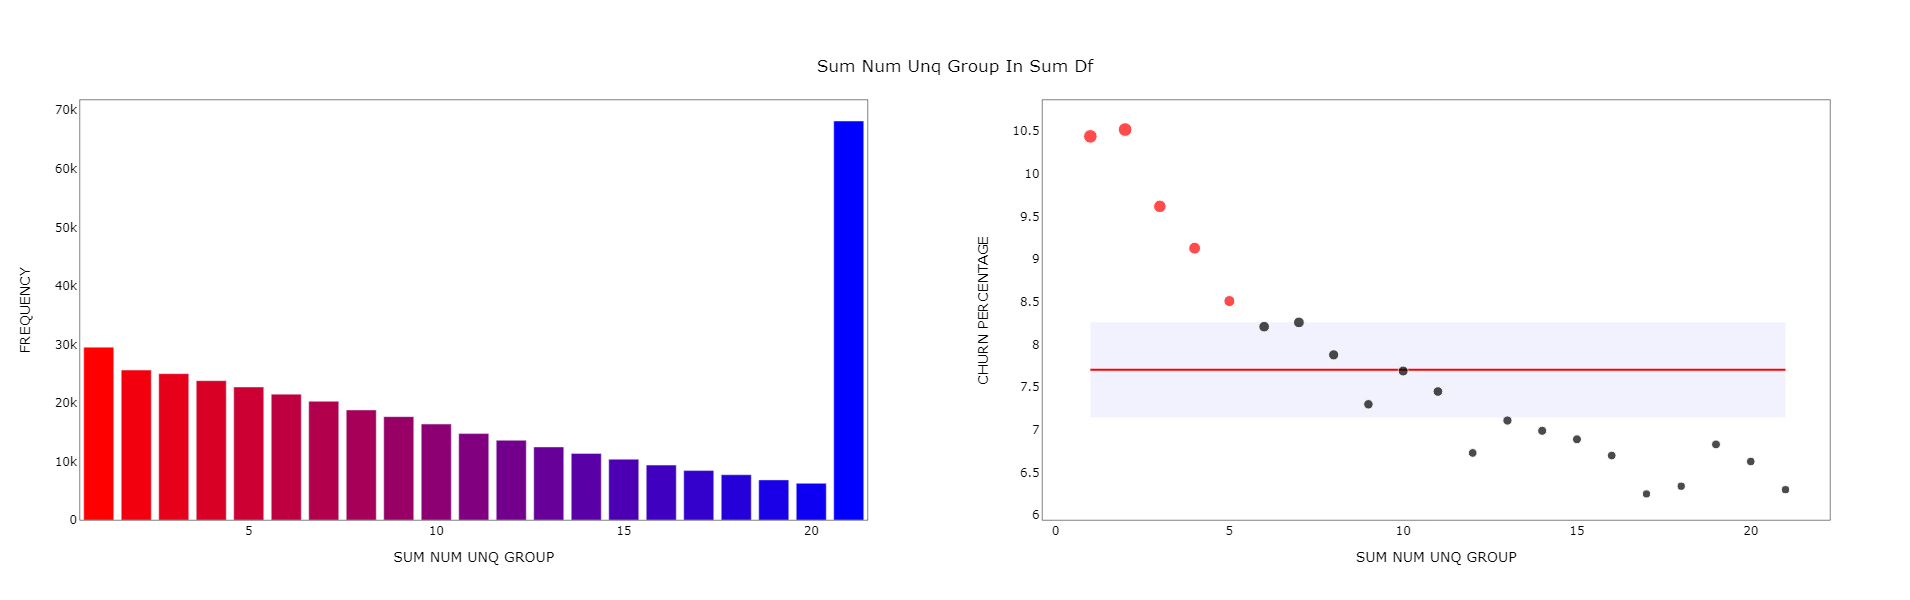

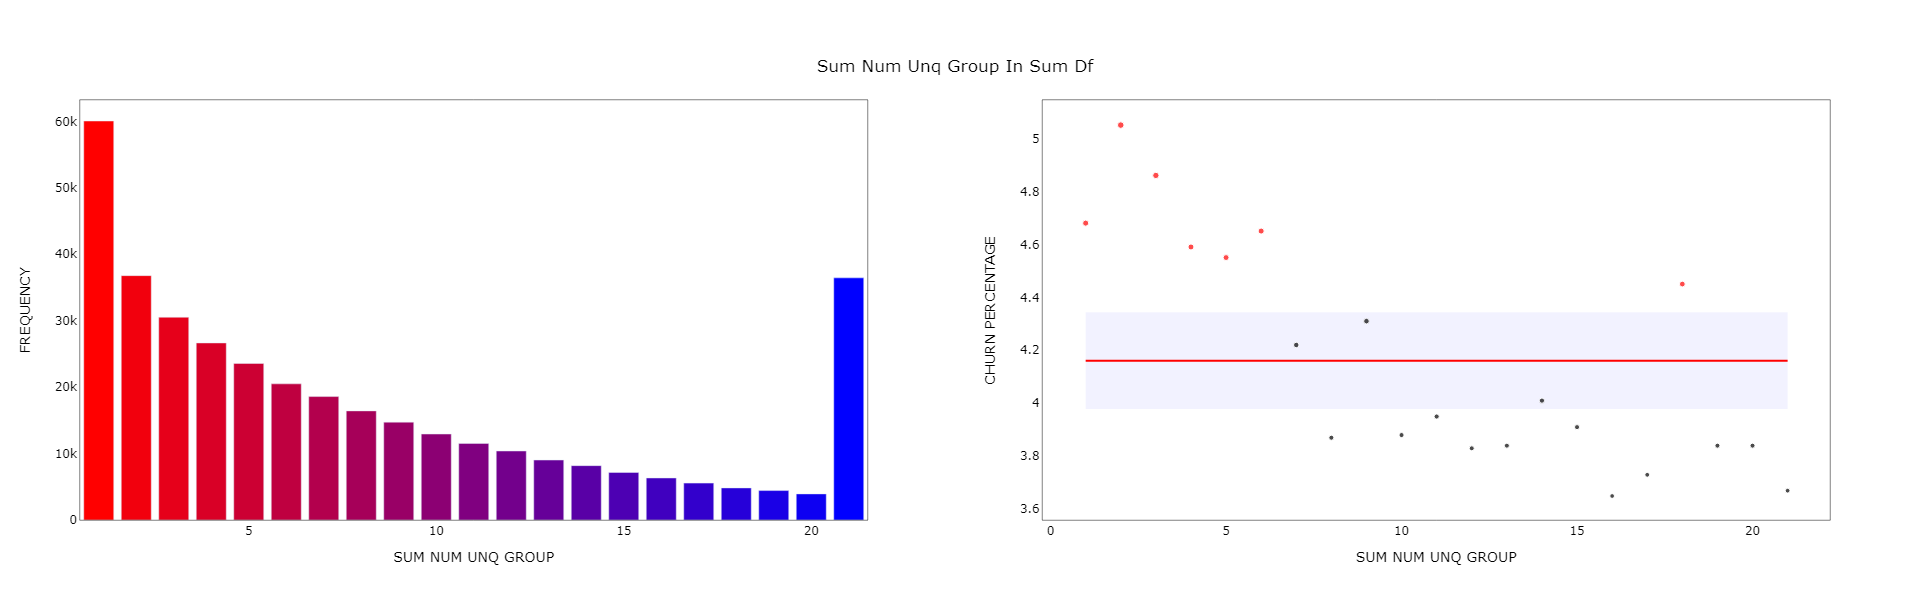

In [26]:
sum_plot(member_model_df, 'sum_num_unq', 'sum_num_unq_group', [1,1000,50])
sum_plot(city_model_df, 'sum_num_unq', 'sum_num_unq_group', [1,1000,50])

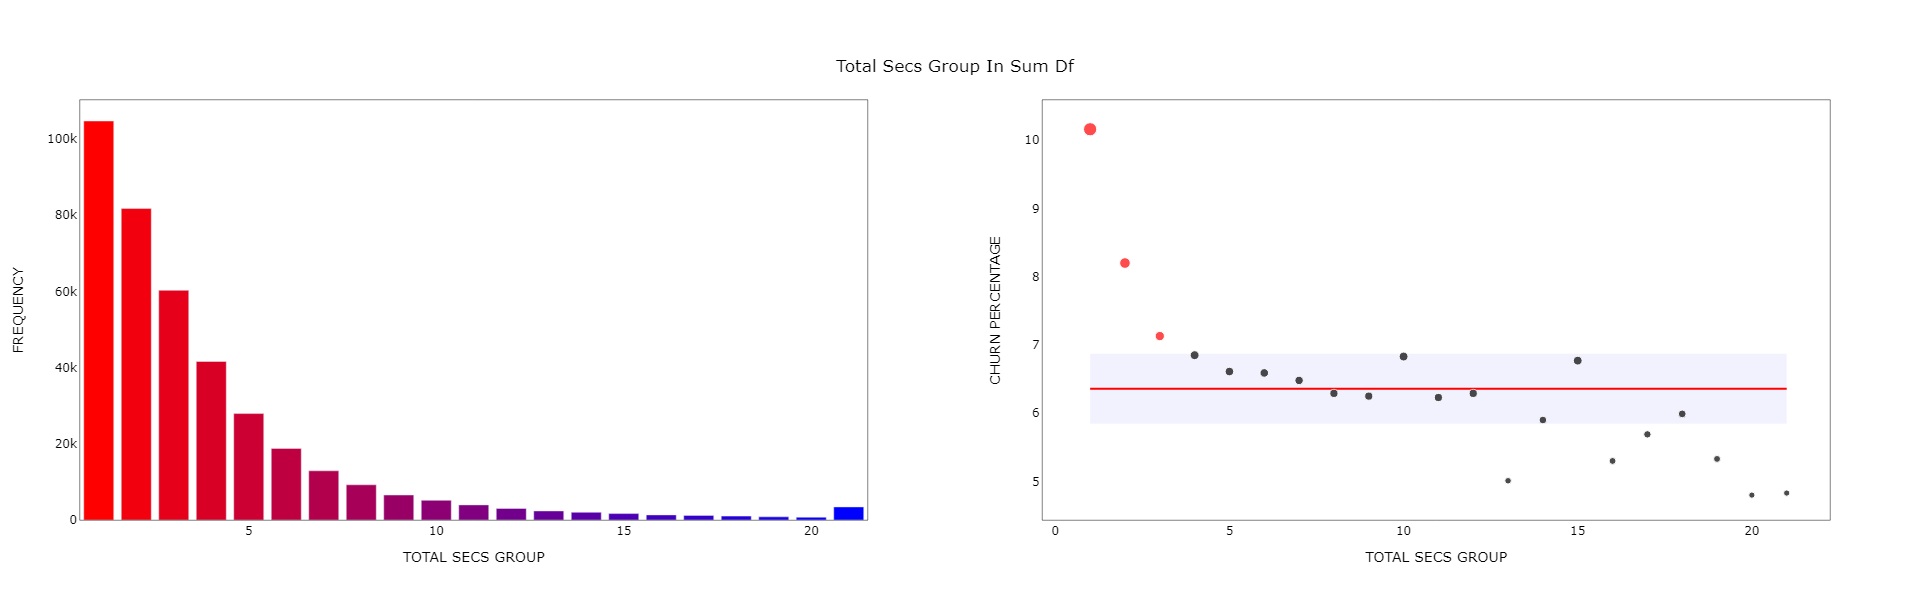

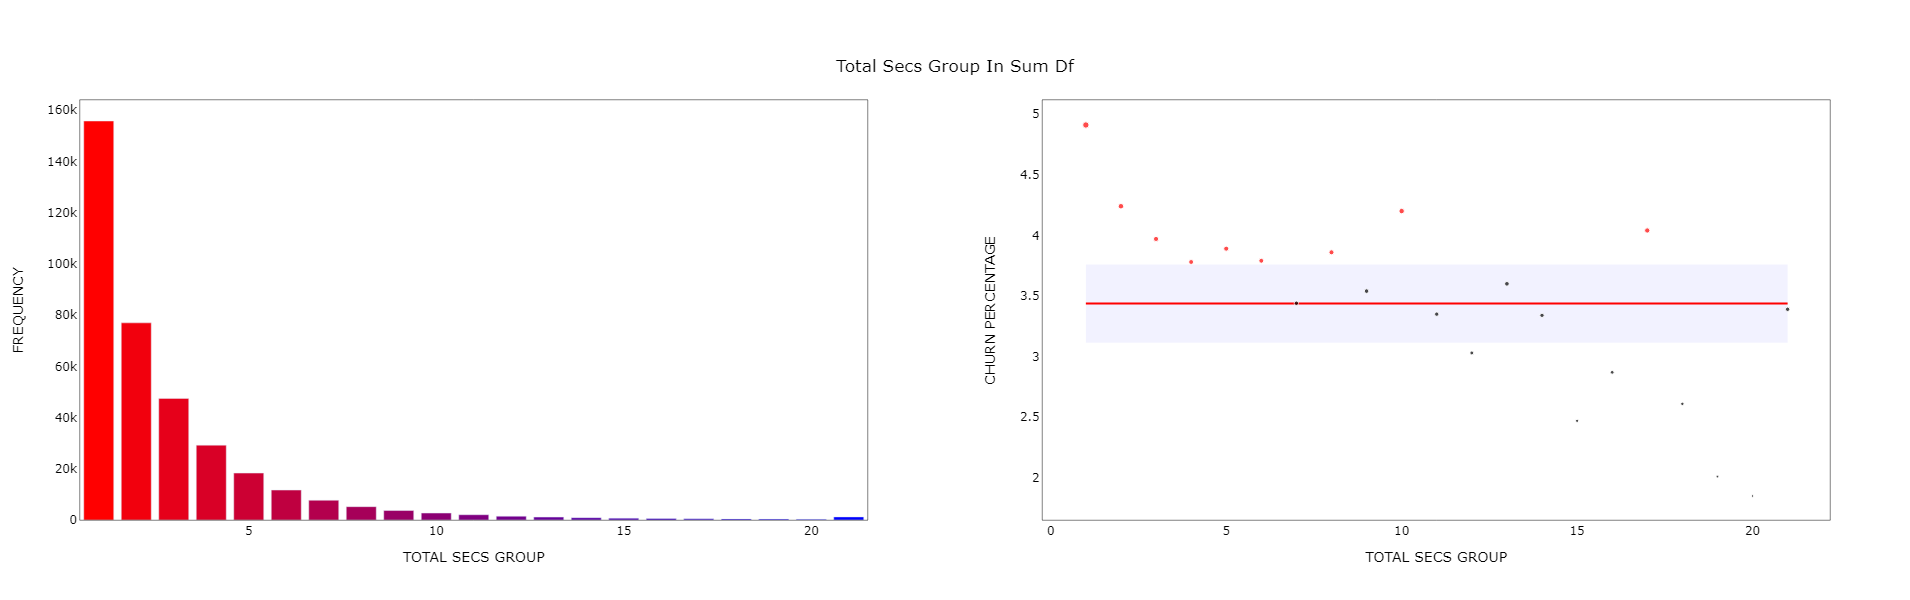

In [27]:
sum_plot(member_model_df, 'total_secs', 'total_secs_group', [0,1000000,50000])
sum_plot(city_model_df, 'total_secs', 'total_secs_group', [0,1000000,50000])